In [1]:
!pip install --upgrade pip
!pip install xlrd

  Using cached https://files.pythonhosted.org/packages/5f/25/e52d3f31441505a5f3af41213346e5b6c221c9e086a166f3703d2ddaf940/pip-18.0-py2.py3-none-any.whl
  Found existing installation: pip 10.0.1
    Uninstalling pip-10.0.1:
      Successfully uninstalled pip-10.0.1
  Using cached https://files.pythonhosted.org/packages/07/e6/e95c4eec6221bfd8528bcc4ea252a850bffcc4be88ebc367e23a1a84b0bb/xlrd-1.1.0-py2.py3-none-any.whl


In [2]:
import pandas as pd
import numpy as np

In [3]:
data = pd.ExcelFile("raw_survey_data.xlsx")
data = data.parse()

In [4]:
pd.set_option('display.max_columns', None)
#display(data.head())

In [5]:
#data.dtypes

In [6]:
data.shape

(95, 428)

In [7]:
data.describe()

,respid,BridgeQ - gidValue - passed in from SMS and contains gid/guid/channeltype,Toluna ID,Email,First Name,Last Name,"29 : Why would you engage in independent learning? Other, please specifycomment"
count,9.500000e+01,9.500000e+01,0.0,0.0,0.0,0.0,0.0
mean,9.771224e+07,9.771224e+07,NaN,NaN,NaN,NaN,NaN
std,5.241981e+05,5.241981e+05,NaN,NaN,NaN,NaN,NaN
min,9.711779e+07,9.711779e+07,NaN,NaN,NaN,NaN,NaN
25%,9.713005e+07,9.713005e+07,NaN,NaN,NaN,NaN,NaN
50%,9.784312e+07,9.784312e+07,NaN,NaN,NaN,NaN,NaN
75%,9.828990e+07,9.828990e+07,NaN,NaN,NaN,NaN,NaN
max,9.835015e+07,9.835015e+07,NaN,NaN,NaN,NaN,NaN


Making df lowercase so I can search through and standardise easily

In [8]:
data = data.apply(lambda x: x.astype(str).str.lower())

Now I'm going to clean up what I've got, getting rid of any unnecessary columns and deleting my row of test data

In [9]:
data[data['3 : What is your job role within the team?'].str.contains("test")]

,respid,BridgeQ - gidValue - passed in from SMS and contains gid/guid/channeltype,INTERVIEW_START,INTERVIEW_END,Interview Status,Panelist Source,Toluna ID,Email,First Name,Last Name,Origin,Mobile,Device Type,Please select your country,"1 : Where do you work within the Met Office hierarchy? - What department do you work in (eg. Technology, Science)?",2 : Where do you work within the Met Office hierarchy? - What team do you work in within that department?,3 : What is your job role within the team?,"4 : Which location within Met Office HQ is your most regular workspace (eg. floor plate, room name)?",5 : How many people work within your team on a regular basis?,"6 : If any, which of these programming, scripting and markup languages have you used in the past 12 months? Do you like using them? Are there any that you would like to know more about? Python I used this at work","6 : If any, which of these programming, scripting and markup languages have you used in the past 12 months? Do you like using them? Are there any that you would like to know more about? Python I used this outside work","6 : If any, which of these programming, scripting and markup languages have you used in the past 12 months? Do you like using them? Are there any that you would like to know more about? Python I enjoyed using this","6 : If any, which of these programming, scripting and markup languages have you used in the past 12 months? Do you like using them? Are there any that you would like to know more about? Python I want to know more about this","6 : If any, which of these programming, scripting and markup languages have you used in the past 12 months? Do you like using them? Are there any that you would like to know more about? Go I used this at work","6 : If any, which of these programming, scripting and markup languages have you used in the past 12 months? Do you like using them? Are there any that you would like to know more about? Go I used this outside work","6 : If any, which of these programming, scripting and markup languages have you used in the past 12 months? Do you like using them? Are there any that you would like to know more about? Go I enjoyed using this","6 : If any, which of these programming, scripting and markup languages have you used in the past 12 months? Do you like using them? Are there any that you would like to know more about? Go I want to know more about this","6 : If any, which of these programming, scripting and markup languages have you used in the past 12 months? Do you like using them? Are there any that you would like to know more about? Javascript I used this at work","6 : If any, which of these programming, scripting and markup languages have you used in the past 12 months? Do you like using them? Are there any that you would like to know more about? Javascript I used this outside work","6 : If any, which of these programming, scripting and markup languages have you used in the past 12 months? Do you like using them? Are there any that you would like to know more about? Javascript I enjoyed using this","6 : If any, which of these programming, scripting and markup languages have you used in the past 12 months? Do you like using them? Are there any that you would like to know more about? Javascript I want to know more about this","6 : If any, which of these programming, scripting and markup languages have you used in the past 12 months? Do you like using them? Are there any that you would like to know more about? C# I used this at work","6 : If any, which of these programming, scripting and markup languages have you used in the past 12 months? Do you like using them? Are there any that you would like to know more about? C# I used this outside work","6 : If any, which of these programming, scripting and markup languages have you used in the past 12 months? Do you like using them? Are there any that you would like to know more about? C# I enjoyed using this","6 : If any, which of these programming, scripting and markup la

In [10]:
a = data[data['6 : If any, which of these programming, scripting and markup languages have you used in the past 12 months? Do you like using them? Are there any that you would like to know more about? Python I used this outside work'].str.contains("yes")].groupby('6 : If any, which of these programming, scripting and markup languages have you used in the past 12 months? Do you like using them? Are there any that you would like to know more about? Python I used this outside work').size()
n = a.apply(lambda x: x).sum()

In [11]:
n

43

Does not seem to contain test data, perhaps a quirk with the survey platform where when you've exported data once it won't export the same data again?

In [12]:
data.shape

(95, 428)

I'm going to drop some unnecessary columns included by the survey platform now.

In [13]:
data = data.drop(labels=["BridgeQ - gidValue - passed in from SMS and contains gid/guid/channeltype", "Interview Status", "Panelist Source", "Toluna ID", "Email", "First Name", "Last Name", "Origin", "Mobile", "Device Type", "Please select your country"], axis=1)

In [14]:
data.shape

(95, 417)

Now I'm going to make smaller dfs specifically for certain tech use to make it easier to work with. We'll start with languages used at work.

In [15]:
job_roles = data["3 : What is your job role within the team?"].unique()

In [16]:
job_roles

array(['developer', 'tech lead', 'senior software developer',
       'apprentice', 'hpc systems specialist', 'front-end developer',
       'web developer. responsibilities: patching, maintenance & small changes of web applications on wave',
       'it practitioner', 'scientific software enginner',
       'scientific software engineer',
       'configuring visual weather for use in the met office',
       'senior scientific software engineer (sse)', 'scientist',
       'scientific systems manager', 'senior it practitioner',
       'software developer', 'it practitioner (software developer)',
       'sse', 'team leader',
       'i develop tests for technical aspects of climate suites and provide some libraries and related infrastructure to climate scientists.',
       'climate monitoring', 'senior developer',
       'senior scientific software engineer', 'supercomputer support',
       'senior frontend developer', 'senior scientist',
       'software engineer', 'technical lead', 'manager

What now needs to be done is operationilising job roles so that some roles are comparable - putting similar ones into same categories, getting them all in the same shorthand format.

First I grouped general and specific job roles into groups to make it easier to view, as well as identifying those that definetely needed cleaning.

In [17]:
general_job_role = ("developer", "apprentice", "scientist", "team leader", "senior scientist", "manager", "expert scientist", "science manager", "technologist", "industrial placement", "engineer", "technical team leader", "summer intern", "tester")
medium_job_role = ("tech lead", "it practitioner", "senior it practitioner", "software developer", "senior developer", "technical lead", "software development", "chief architect, ")
specific_job_role = ("senior software developer", "hpc systems specialist", "front-end developer", "scientific software engineer", "scientific systems manager", "climate monitoring", "senior scientific software engineer", "supercomputer support", "senior frontend developer", "software engineer", "senior software engineer", "verification scientist", "hpc optimisation", "fm & technical services manager", "enterprise it architect", "scientist / data quality", "solutions architect", "consultant software developer", 'part time tester / front end developer', "business continuity analyst", "cloud infrastructure engineer", 'monsoon tech lead', 'infrastucture architect', 'principal security and information risk advisor')
to_operationalise_job_role = ("web developer. responsibilities: patching, maintenance & small changes of web applications on wave", "configuring visual weather for use in the met office", "it practitioner (software developer)", "sse", "i develop tests for technical aspects of climate suites and provide some libraries and related infrastructure to climate scientists", "software developer (it practitioner)", "automation and scripting mainly", "sitp", "model owner", 'gnss-ro scientific research', "i manage a team of scientific software engineers, working closely with the scientists", "itm", "industrial placement student")

First I replaced things that clearly needed cleaning.

In [18]:
#first to replace - whole values, no regex, exact string, most specific first

edited_data = data.replace(to_replace='web developer. responsibilities: patching, maintenance & small changes of web applications on wave', value='web developer')

In [19]:
edited_data = edited_data.replace(to_replace='it practitioner (software developer)', value='software developer')
edited_data = edited_data.replace(to_replace='senior scientific software engineer (sse)', value='senior scientific software engineer')
edited_data = edited_data.replace(to_replace='sse', value='scientific software engineer')
edited_data = edited_data.replace(to_replace='software developer (it practitioner)', value='software developer')
edited_data = edited_data.replace(to_replace='sitp', value='senior it practitioner')
edited_data = edited_data.replace(to_replace='i manage a team of scientific software engineers, working closely with the scientists', value='scientific software engineer manager')
edited_data = edited_data.replace(to_replace='itm', value='it manager')
edited_data = edited_data.replace(to_replace='scientific software enginner', value='scientific software engineer')
edited_data = edited_data.replace(to_replace='i\'m a business continuity analyst', value='business continuity analyst')
edited_data = edited_data.replace(to_replace='frontend developer', value='front end developer')
edited_data = edited_data.replace(to_replace='senior it practioner', value='senior it practitioner')
edited_data = edited_data.replace(to_replace='configuring visual weather for use in the met office', value='scientific software engineer')
edited_data = edited_data.replace(to_replace='i develop tests for technical aspects of climate suites and provide some libraries and related infrastructure to climate scientists.', value='scientific software engineer')

In [20]:
#second to replace - punctuation, regex needed but make sure not lookup values
edited_data = edited_data.replace(to_replace="\.", value="")
edited_data = edited_data.replace(to_replace='  ', value=' ', regex=True)
edited_data = edited_data.replace(to_replace=' / ', value=' ', regex=True)
edited_data = edited_data.replace(to_replace='-', value=' ', regex=True)


This leaves us with a more cleaned up list of job roles but still with the specific information participants wanted to include preserved. We're going to keep a version of this list to refer back to later. We're also going to make a more operationalised list for the purposes of analysis.

In [21]:
job_roles1 = edited_data["3 : What is your job role within the team?"].unique()
job_roles1

array(['developer', 'tech lead', 'senior software developer',
       'apprentice', 'hpc systems specialist', 'front end developer',
       'web developer', 'it practitioner', 'scientific software engineer',
       'senior scientific software engineer', 'scientist',
       'scientific systems manager', 'senior it practitioner',
       'software developer', 'team leader', 'climate monitoring',
       'senior developer', 'supercomputer support',
       'senior frontend developer', 'senior scientist',
       'software engineer', 'technical lead', 'manager',
       'senior software engineer', 'verification scientist',
       'automation and scripting mainly', 'expert scientist', 'nan',
       'model owner', 'gnss ro scientific research',
       'scientific software engineer manager', 'science manager',
       'hpc optimisation', 'software development',
       'fm & technical services manager', 'enterprise it architect',
       'technologist', 'scientist data quality', 'industrial placement'

In [22]:
#add column 'manager/senior/expert position', yes/no here?

Now we start putting job roles in categories based on the lowest common denomenators of specificity.

In [23]:
edited_data = edited_data.replace(to_replace='gnss ro scientific research', value='scientist')
edited_data = edited_data.replace(to_replace='part time tester front end developer', value='front end developer')

Here we define new job roles in terms of more specified categories, in order to gain appropriate groups for analysis. This is done by getting the count of each named job role and deciding subjectively which are the most appropriate categories to operationalise into.

In [24]:
edited_data["3 : What is your job role within the team?"].value_counts()

senior it practitioner                             8
software developer                                 7
tech lead                                          5
scientific software engineer                       5
technical lead                                     5
scientist                                          4
developer                                          4
software engineer                                  3
senior software developer                          3
it practitioner                                    2
senior developer                                   2
industrial placement                               2
apprentice                                         2
manager                                            2
senior scientific software engineer                2
front end developer                                2
team leader                                        2
principal security and information risk advisor    1
automation and scripting mainly               

In [25]:
#creating category of intern/placement/apprentice
edited_data = edited_data.replace(to_replace='apprentice', value='intern/placement/apprentice')
edited_data = edited_data.replace(to_replace='industrial placement', value='intern/placement/apprentice')
edited_data = edited_data.replace(to_replace='summer intern', value='intern/placement/apprentice')
edited_data = edited_data.replace(to_replace='industrial placement student', value='intern/placement/apprentice')

In [26]:
#creating category of scientific software engineer
edited_data = edited_data.replace(to_replace='senior scientific software engineer', value='scientific software engineer')
edited_data = edited_data.replace(to_replace='scientific software engineer manager', value='scientific software engineer')

In [27]:
edited_data["3 : What is your job role within the team?"].value_counts()

scientific software engineer                       8
senior it practitioner                             8
software developer                                 7
intern/placement/apprentice                        6
technical lead                                     5
tech lead                                          5
scientist                                          4
developer                                          4
software engineer                                  3
senior software developer                          3
senior developer                                   2
team leader                                        2
front end developer                                2
it practitioner                                    2
manager                                            2
expert scientist                                   1
scientific systems manager                         1
business continuity analyst                        1
senior scientist                              

In [28]:
edited_data = edited_data.replace(to_replace='senior software developer', value='software developer')
edited_data = edited_data.replace(to_replace='senior developer', value='software developer')
edited_data = edited_data.replace(to_replace='software development', value='software developer')
edited_data = edited_data.replace(to_replace='developer', value='software developer')
edited_data = edited_data.replace(to_replace='consultant software developer', value='software developer')

In [29]:
edited_data = edited_data.replace(to_replace='tech lead', value='technical lead')

In [30]:
edited_data["3 : What is your job role within the team?"].value_counts()

software developer                                 18
technical lead                                     10
scientific software engineer                        8
senior it practitioner                              8
intern/placement/apprentice                         6
scientist                                           4
software engineer                                   3
front end developer                                 2
team leader                                         2
manager                                             2
it practitioner                                     2
hpc systems specialist                              1
chief architect                                     1
principal security and information risk advisor     1
engineer                                            1
fm & technical services manager                     1
business continuity analyst                         1
automation and scripting mainly                     1
tester                      

In [31]:
edited_data = edited_data.replace(to_replace='senior it practitioner', value='it practitioner')
edited_data = edited_data.replace(to_replace='it manager', value='it practitioner')

In [32]:
edited_data["3 : What is your job role within the team?"].value_counts()

software developer                                 18
it practitioner                                    11
technical lead                                     10
scientific software engineer                        8
intern/placement/apprentice                         6
scientist                                           4
software engineer                                   3
front end developer                                 2
team leader                                         2
manager                                             2
fm & technical services manager                     1
chief architect                                     1
principal security and information risk advisor     1
engineer                                            1
business continuity analyst                         1
hpc systems specialist                              1
automation and scripting mainly                     1
tester                                              1
senior scientist            

In [33]:
edited_data = edited_data.replace(to_replace='senior frontend developer', value='front end developer')
edited_data = edited_data.replace(to_replace='monsoon tech lead', value='technical lead')
edited_data = edited_data.replace(to_replace='technical team leader', value='technical lead')
edited_data = edited_data.replace(to_replace='senior scientist', value='scientist')
edited_data = edited_data.replace(to_replace='expert scientist', value='scientist')
edited_data = edited_data.replace(to_replace='science manager', value='scientist')
edited_data = edited_data.replace(to_replace='senior software engineer', value='software engineer')

In [34]:
edited_data["3 : What is your job role within the team?"].value_counts()

software developer                                 18
technical lead                                     12
it practitioner                                    11
scientific software engineer                        8
scientist                                           7
intern/placement/apprentice                         6
software engineer                                   4
front end developer                                 3
manager                                             2
team leader                                         2
tester                                              1
business continuity analyst                         1
cloud infrastructure engineer                       1
hpc systems specialist                              1
scientific systems manager                          1
verification scientist                              1
engineer                                            1
chief architect                                     1
model owner                 

In [35]:
edited_data = edited_data.replace(to_replace='tester', value='software tester')
edited_data = edited_data.replace(to_replace='verification scientist', value='scientist')
edited_data = edited_data.replace(to_replace='scientist data quality', value='scientist')
edited_data = edited_data.replace(to_replace='model owner', value='scientist')
edited_data = edited_data.replace(to_replace='technologist', value='it practitioner')
edited_data = edited_data.replace(to_replace='automation and scripting mainly', value='it practitioner')
edited_data = edited_data.replace(to_replace='hpc optimisation', value='hpc support')
edited_data = edited_data.replace(to_replace='hpc systems specialist', value='hpc support')
edited_data = edited_data.replace(to_replace='supercomputer support', value='hpc support')

In [36]:
edited_data["3 : What is your job role within the team?"].value_counts()

software developer                                 18
it practitioner                                    13
technical lead                                     12
scientist                                          10
scientific software engineer                        8
intern/placement/apprentice                         6
software engineer                                   4
hpc support                                         3
front end developer                                 3
manager                                             2
team leader                                         2
web developer                                       1
nan                                                 1
scientific systems manager                          1
principal security and information risk advisor     1
infrastucture architect                             1
fm & technical services manager                     1
climate monitoring                                  1
business continuity analyst 

In [37]:
edited_data = edited_data.replace(to_replace='solutions architect', value='technology architect')
edited_data = edited_data.replace(to_replace='enterprise it architect', value='technology architect')
edited_data = edited_data.replace(to_replace='infrastucture architect', value='technology architect')
edited_data = edited_data.replace(to_replace='chief architect', value='solutions architect')
edited_data = edited_data.replace(to_replace='web developer', value='software developer')
edited_data = edited_data.replace(to_replace='cloud infrastructure engineer', value='software engineer')
edited_data = edited_data.replace(to_replace='fm & technical services manager', value='technical services and facility management')
edited_data = edited_data.replace(to_replace='scientific systems manager', value='scientific software engineer')
edited_data = edited_data.replace(to_replace='climate monitoring', value='climate monitor')
edited_data = edited_data.replace(to_replace='software tester', value='software developer')

In [38]:
edited_data["3 : What is your job role within the team?"].value_counts()

software developer                                 20
it practitioner                                    13
technical lead                                     12
scientist                                          10
scientific software engineer                        9
intern/placement/apprentice                         6
software engineer                                   5
hpc support                                         3
front end developer                                 3
technology architect                                3
manager                                             2
team leader                                         2
business continuity analyst                         1
technical services and facility management          1
engineer                                            1
climate monitor                                     1
nan                                                 1
solutions architect                                 1
principal security and infor

Stripping any leading or trailing whitespace leftover from replacements

Attempting to add a new column to the dataframe to add preserved job role information. Doesn't work, come back to it later.

In [39]:
#doesn't work, fix later. intended to merge with original cleaned job role description to refer back to
# edited_data.merge(job_roles1, how='right')
# edited_data.head()

Preserving original department data before cleanup

In [40]:
original_department = edited_data["1 : Where do you work within the Met Office hierarchy? - What department do you work in (eg. Technology, Science)?"]

In [41]:
edited_data = edited_data.replace("technolgy","technology")

In [42]:
edited_data["1 : Where do you work within the Met Office hierarchy? - What department do you work in (eg. Technology, Science)?"] = edited_data["1 : Where do you work within the Met Office hierarchy? - What department do you work in (eg. Technology, Science)?"].replace("tis","technology")
edited_data["1 : Where do you work within the Met Office hierarchy? - What department do you work in (eg. Technology, Science)?"] = edited_data["1 : Where do you work within the Met Office hierarchy? - What department do you work in (eg. Technology, Science)?"].replace("technology/solutions delivery/web apps","technology")
edited_data["1 : Where do you work within the Met Office hierarchy? - What department do you work in (eg. Technology, Science)?"] = edited_data["1 : Where do you work within the Met Office hierarchy? - What department do you work in (eg. Technology, Science)?"].replace("solutions delivery","technology")
edited_data["1 : Where do you work within the Met Office hierarchy? - What department do you work in (eg. Technology, Science)?"] = edited_data["1 : Where do you work within the Met Office hierarchy? - What department do you work in (eg. Technology, Science)?"].replace("technology and obs","technology")
edited_data["1 : Where do you work within the Met Office hierarchy? - What department do you work in (eg. Technology, Science)?"] = edited_data["1 : Where do you work within the Met Office hierarchy? - What department do you work in (eg. Technology, Science)?"].replace("office of the cio","technology")
edited_data["1 : Where do you work within the Met Office hierarchy? - What department do you work in (eg. Technology, Science)?"] = edited_data["1 : Where do you work within the Met Office hierarchy? - What department do you work in (eg. Technology, Science)?"].replace("i&o","technology")
edited_data["1 : Where do you work within the Met Office hierarchy? - What department do you work in (eg. Technology, Science)?"] = edited_data["1 : Where do you work within the Met Office hierarchy? - What department do you work in (eg. Technology, Science)?"].replace("technology in product creation","technology")
edited_data["1 : Where do you work within the Met Office hierarchy? - What department do you work in (eg. Technology, Science)?"] = edited_data["1 : Where do you work within the Met Office hierarchy? - What department do you work in (eg. Technology, Science)?"].replace("solutions delivery, technology information services","technology")
edited_data["1 : Where do you work within the Met Office hierarchy? - What department do you work in (eg. Technology, Science)?"] = edited_data["1 : Where do you work within the Met Office hierarchy? - What department do you work in (eg. Technology, Science)?"].replace("technology  > government services","technology")
edited_data["1 : Where do you work within the Met Office hierarchy? - What department do you work in (eg. Technology, Science)?"] = edited_data["1 : Where do you work within the Met Office hierarchy? - What department do you work in (eg. Technology, Science)?"].replace("operations","technology")

In [43]:
edited_data["1 : Where do you work within the Met Office hierarchy? - What department do you work in (eg. Technology, Science)?"] = edited_data["1 : Where do you work within the Met Office hierarchy? - What department do you work in (eg. Technology, Science)?"].replace("climate science","science")
edited_data["1 : Where do you work within the Met Office hierarchy? - What department do you work in (eg. Technology, Science)?"] = edited_data["1 : Where do you work within the Met Office hierarchy? - What department do you work in (eg. Technology, Science)?"].replace("weather science it","science")
edited_data["1 : Where do you work within the Met Office hierarchy? - What department do you work in (eg. Technology, Science)?"] = edited_data["1 : Where do you work within the Met Office hierarchy? - What department do you work in (eg. Technology, Science)?"].replace("obs r&d","science")
edited_data["1 : Where do you work within the Met Office hierarchy? - What department do you work in (eg. Technology, Science)?"] = edited_data["1 : Where do you work within the Met Office hierarchy? - What department do you work in (eg. Technology, Science)?"].replace("applied science","science")

In [44]:
edited_data["1 : Where do you work within the Met Office hierarchy? - What department do you work in (eg. Technology, Science)?"] = edited_data["1 : Where do you work within the Met Office hierarchy? - What department do you work in (eg. Technology, Science)?"].replace("business group","science")
edited_data["1 : Where do you work within the Met Office hierarchy? - What department do you work in (eg. Technology, Science)?"] = edited_data["1 : Where do you work within the Met Office hierarchy? - What department do you work in (eg. Technology, Science)?"].replace("cfo","others")

In [45]:
edited_data["1 : Where do you work within the Met Office hierarchy? - What department do you work in (eg. Technology, Science)?"].value_counts().to_frame('Frequency')

,Frequency
technology,68
science,26
others,1


Preserving original team data before cleanup.

In [46]:
original_team = edited_data["2 : Where do you work within the Met Office hierarchy? - What team do you work in within that department?"]

In [47]:
edited_data = edited_data.replace(['netowrk services', 'networks services'], 'network services')

edited_data = edited_data.replace(['security testing', 'cyber, security and resilience   business continuity', 'cyber security and resilience'], 'security')

edited_data = edited_data.replace(["solutions delivery   data services", 'solutions delivery > government services', 'government technology', 'defence'], 'solutions delivery')

edited_data = edited_data.replace(['ccc', 'cloud  capability', 'cloud capabilities', "cloud capability catalogue   arcus squad", 'cloud capability', 'i & oforecasting applications support', 'i&o', 'i&o architecture', 'i&o cloud capability', 'infrastructure', 'network services', 'underpinning capability', 'cloudops', 'cloud ops'], 'infrastructure and operations')

edited_data = edited_data.replace('obs', 'observations')

edited_data = edited_data.replace('the informatics lab', 'informatics lab')

edited_data = edited_data.replace(['tis   data services', 'tis - data services', 'data services', 'aardwolf', 'awesome', 'rru', 'alchemy', 'geoapps', 'geospatial applications   kraken squad', 'moose', 'metdb', 'plans and performance', 'avd (analysis, visualisation and data)', 'avd', 'avd (within tis)', 'analysis, visualisation and data', 'broadcast graphics team'], 'technology and information service')

edited_data = edited_data.replace(['hpc & collaboration', 'hpc team'], 'high performance computing')

In [48]:
edited_data = edited_data.replace(['climate', 'climate information for international development', 'climate science it (data delivery)', 'understanding climate change', 'mdvp operational systems', 'it apps', 'crum'], 'climate science')

edited_data = edited_data.replace(['hpc optimisation team', 'hpc optimisation', 'high performance computing optimisation'], 'high performance computing')

edited_data = edited_data.replace(['vipp', "weather science verification, impacts, and post processing   specifically, post processing and verification systems", "verification, impacts and post processing", 'weather science it', 'modelling infrastructure support systems a.k.a. fcm, rose, cylc, team', 'satellite applications', "convective scale data assimilation and ensembles", "weather science verification, impacts, and post processing specifically, post processing and verification systems"], 'weather science')

edited_data = edited_data.replace(['sferics', 'atmospheric processes and parameterizations'], 'atmostpheric science')

edited_data = edited_data.replace(['research to operations', 'aviation applications'], 'applied science')

edited_data = edited_data.replace(['met research unit obr foundation science', 'ofrd', 'property management', 'public website', 'digital'], 'other')

edited_data['2 : Where do you work within the Met Office hierarchy? - What team do you work in within that department?'] = edited_data['2 : Where do you work within the Met Office hierarchy? - What team do you work in within that department?'].replace('nan', 'other')

edited_data['2 : Where do you work within the Met Office hierarchy? - What team do you work in within that department?'] = edited_data['2 : Where do you work within the Met Office hierarchy? - What team do you work in within that department?'].replace('hpc support', 'high performance computing')

In [49]:
edited_data["2 : Where do you work within the Met Office hierarchy? - What team do you work in within that department?"].value_counts()

technology and information service    23
infrastructure and operations         16
solutions delivery                     9
climate science                        8
weather science                        7
other                                  6
applied science                        5
platforms                              4
informatics lab                        4
high performance computing             4
security                               3
atmostpheric science                   2
enterprise it architecture             2
observations                           2
Name: 2 : Where do you work within the Met Office hierarchy? - What team do you work in within that department?, dtype: int64

In [50]:
edited_data = edited_data.apply(lambda x: x.str.strip())

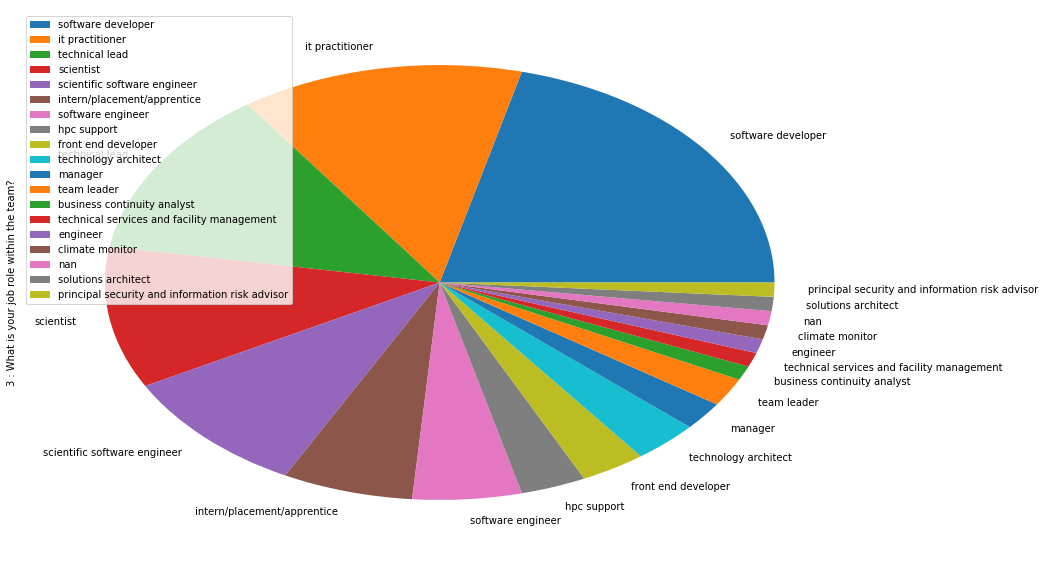

In [83]:
edited_data["3 : What is your job role within the team?"].value_counts(dropna=True).plot.pie(legend=True, figsize=(15,10))

In [51]:
techsatisfaction  = pd.DataFrame(columns=['Job Role', 'techsatisfaction'])

In [52]:
techsatisfaction['Job Role'] = edited_data["3 : What is your job role within the team?"]
techsatisfaction['techsatisfaction'] = edited_data['32 : How much do you agree with the following statements: I think the technology I use at work is suitable for what I do.']
techsatisfaction

,Job Role,techsatisfaction
0,software developer,agree
1,technical lead,agree
2,software developer,agree
3,intern/placement/apprentice,agree
4,hpc support,agree
5,front end developer,agree
6,intern/placement/apprentice,agree
7,software developer,agree
8,it practitioner,disagree
9,scientific software engineer,disagree


In [53]:
techsatisfaction = techsatisfaction[techsatisfaction['techsatisfaction'] != 'nan']
techsatisfaction = techsatisfaction[techsatisfaction['Job Role'] != 'nan']
techsatisfaction

,Job Role,techsatisfaction
0,software developer,agree
1,technical lead,agree
2,software developer,agree
3,intern/placement/apprentice,agree
4,hpc support,agree
5,front end developer,agree
6,intern/placement/apprentice,agree
7,software developer,agree
8,it practitioner,disagree
9,scientific software engineer,disagree


In [57]:
techsatisfaction['Job Role'] = techsatisfaction['Job Role'].replace(['manager', 'team leader', 'solutions architect', 'engineer', 'technical services and facility management', 'technology architect', 'business continuity analyst'], 'other')
numberofemployees = techsatisfaction['Job Role'].value_counts().to_dict()
numberofemployees

{'software developer': 17,
 'it practitioner': 12,
 'scientist': 10,
 'other': 9,
 'technical lead': 8,
 'scientific software engineer': 7,
 'intern/placement/apprentice': 5,
 'software engineer': 4,
 'front end developer': 3,
 'hpc support': 3}

In [62]:
joblist = list(techsatisfaction['Job Role'].unique())

In [63]:
import matplotlib.pyplot as plt

In [64]:
overalldict = {}
def tech_satisfaction_by_job(job):
    tempdf = techsatisfaction.loc[techsatisfaction['Job Role'] == job]
    percentagecount = tempdf['techsatisfaction'].value_counts()*100/numberofemployees[job]
    jobdict = dict(percentagecount)
    overalldict[job]= jobdict
    return overalldict

In [65]:
for job in joblist:
    tech_satisfaction_by_job(job)

In [70]:
Techsatisfactionframe = pd.DataFrame.from_dict(overalldict)
Techsatisfactionframe = Techsatisfactionframe.replace(np.nan, 0)
Techsatisfactionframe = Techsatisfactionframe.reindex(['strongly disagree', 'disagree', 'neither agree or disagree', 'agree', 'strongly agree'])
Techsatisfactionframe

,software developer,technical lead,intern/placement/apprentice,hpc support,front end developer,it practitioner,scientific software engineer,scientist,other,software engineer
strongly disagree,5.882353,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,11.111111,0.0
disagree,11.764706,0.0,0.0,0.000000,0.000000,16.666667,28.571429,30.0,0.000000,25.0
neither agree or disagree,0.000000,25.0,0.0,33.333333,0.000000,8.333333,0.000000,0.0,0.000000,0.0
agree,64.705882,62.5,80.0,66.666667,33.333333,58.333333,57.142857,70.0,77.777778,75.0
strongly agree,17.647059,12.5,20.0,0.000000,66.666667,16.666667,14.285714,0.0,11.111111,0.0


In [75]:
Techsatisfactionframe = pd.DataFrame.transpose(Techsatisfactionframe)
Techsatisfactionframe = Techsatisfactionframe.reindex(index = ['software developer', 'technical lead', 'intern/placement/apprentice','hpc support', 'front end developer', 'it practitioner','scientific software engineer', 'scientist','software engineer', 'other'])
Techsatisfactionframe

,strongly disagree,disagree,neither agree or disagree,agree,strongly agree
software developer,5.882353,11.764706,0.000000,64.705882,17.647059
technical lead,0.000000,0.000000,25.000000,62.500000,12.500000
intern/placement/apprentice,0.000000,0.000000,0.000000,80.000000,20.000000
hpc support,0.000000,0.000000,33.333333,66.666667,0.000000
front end developer,0.000000,0.000000,0.000000,33.333333,66.666667
it practitioner,0.000000,16.666667,8.333333,58.333333,16.666667
scientific software engineer,0.000000,28.571429,0.000000,57.142857,14.285714
scientist,0.000000,30.000000,0.000000,70.000000,0.000000
software engineer,0.000000,25.000000,0.000000,75.000000,0.000000
other,11.111111,0.000000,0.000000,77.777778,11.111111


In [76]:
from textwrap import wrap

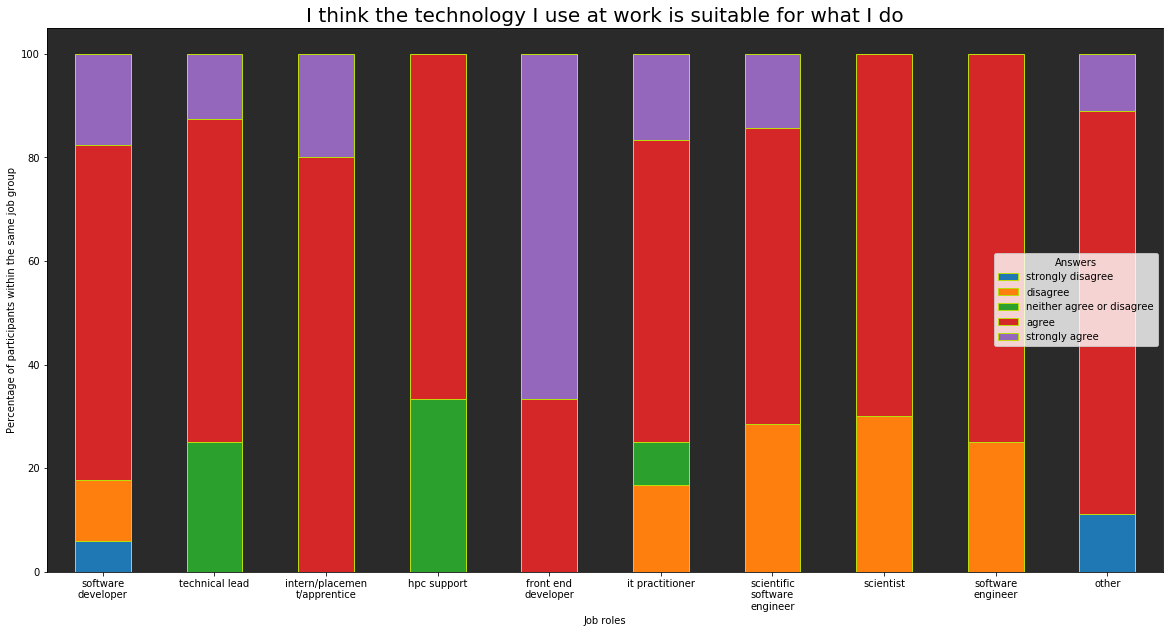

In [78]:
fig = Techsatisfactionframe.plot.bar(stacked=True, edgecolor='#B9DC0C', figsize=(20,10))
wrappedjobs = [ '\n'.join(wrap(l, 15)) for l in list(Techsatisfactionframe.index) ]
fig.set_xticklabels(wrappedjobs)
plt.xticks(rotation='horizontal')
plt.xlabel('Job roles')
plt.ylabel('Percentage of participants within the same job group')
fig.set_facecolor('#2A2A2A')
plt.legend(loc='center right', title='Answers')
plt.title('I think the technology I use at work is suitable for what I do', fontsize=20)
plt.savefig(fname='techsatisfaction.png', dpi=350, bbox_inches='tight')

In [53]:
#make work
#edited_data.merge(original_team, how='right')

Now I'm going to define my functions to get the counts for each unique job role for tech use. I would like the output to be a dataframe with job role in one column, the relevant tech in another the count of use at work in another. For more than one piece of tech used within a job role, the tech and job role will be repeated as necessary.

In [54]:
languages_df = edited_data.iloc[:, slice(8,84,4)]

In [55]:
languages_df.shape

(95, 19)

In [56]:
main_metrics = edited_data.iloc[:, slice(3,8)]
main_metrics.shape

(95, 5)

In [57]:
languages_df.head(1)

,"6 : If any, which of these programming, scripting and markup languages have you used in the past 12 months? Do you like using them? Are there any that you would like to know more about? Python I used this at work","6 : If any, which of these programming, scripting and markup languages have you used in the past 12 months? Do you like using them? Are there any that you would like to know more about? Go I used this at work","6 : If any, which of these programming, scripting and markup languages have you used in the past 12 months? Do you like using them? Are there any that you would like to know more about? Javascript I used this at work","6 : If any, which of these programming, scripting and markup languages have you used in the past 12 months? Do you like using them? Are there any that you would like to know more about? C# I used this at work","6 : If any, which of these programming, scripting and markup languages have you used in the past 12 months? Do you like using them? Are there any that you would like to know more about? Clojure I used this at work","6 : If any, which of these programming, scripting and markup languages have you used in the past 12 months? Do you like using them? Are there any that you would like to know more about? Bash/Shell I used this at work","6 : If any, which of these programming, scripting and markup languages have you used in the past 12 months? Do you like using them? Are there any that you would like to know more about? Scala I used this at work","6 : If any, which of these programming, scripting and markup languages have you used in the past 12 months? Do you like using them? Are there any that you would like to know more about? SQL I used this at work","6 : If any, which of these programming, scripting and markup languages have you used in the past 12 months? Do you like using them? Are there any that you would like to know more about? HTML I used this at work","6 : If any, which of these programming, scripting and markup languages have you used in the past 12 months? Do you like using them? Are there any that you would like to know more about? CSS I used this at work","6 : If any, which of these programming, scripting and markup languages have you used in the past 12 months? Do you like using them? Are there any that you would like to know more about? Julia I used this at work","6 : If any, which of these programming, scripting and markup languages have you used in the past 12 months? Do you like using them? Are there any that you would like to know more about? Java I used this at work","6 : If any, which of these programming, scripting and markup languages have you used in the past 12 months? Do you like using them? Are there any that you would like to know more about? R I used this at work","6 : If any, which of these programming, scripting and markup languages have you used in the past 12 months? Do you like using them? Are there any that you would like to know more about? Ruby I used this at work","6 : If any, which of these programming, scripting and markup languages have you used in the past 12 months? Do you like using them? Are there any that you would like to know more about? PHP I used this at work","6 : If any, which of these programming, scripting and markup languages have you used in the past 12 months? Do you like using them? Are there any that you would like to know more about? Matlab I used this at work","6 : If any, which of these programming, scripting and markup languages have you used in the past 12 months? Do you like using them? Are there any that you would like to know more about? Perl I used this at work","6 : If any, which of these programming, scripting and markup languages have you used in the past 12 months? Do you like using them? Are there any that you would like to know more about? Fortran I used this at work","7 : If any, which of these programming, scripting and markup languages have you used in the past 12 months? Do you like using them? Are there any that

In [58]:
languages_df = pd.concat([main_metrics, languages_df], axis=1)

In [59]:
languages_df.shape

(95, 24)

In [60]:
languages_df.head(5)

,"1 : Where do you work within the Met Office hierarchy? - What department do you work in (eg. Technology, Science)?",2 : Where do you work within the Met Office hierarchy? - What team do you work in within that department?,3 : What is your job role within the team?,"4 : Which location within Met Office HQ is your most regular workspace (eg. floor plate, room name)?",5 : How many people work within your team on a regular basis?,"6 : If any, which of these programming, scripting and markup languages have you used in the past 12 months? Do you like using them? Are there any that you would like to know more about? Python I used this at work","6 : If any, which of these programming, scripting and markup languages have you used in the past 12 months? Do you like using them? Are there any that you would like to know more about? Go I used this at work","6 : If any, which of these programming, scripting and markup languages have you used in the past 12 months? Do you like using them? Are there any that you would like to know more about? Javascript I used this at work","6 : If any, which of these programming, scripting and markup languages have you used in the past 12 months? Do you like using them? Are there any that you would like to know more about? C# I used this at work","6 : If any, which of these programming, scripting and markup languages have you used in the past 12 months? Do you like using them? Are there any that you would like to know more about? Clojure I used this at work","6 : If any, which of these programming, scripting and markup languages have you used in the past 12 months? Do you like using them? Are there any that you would like to know more about? Bash/Shell I used this at work","6 : If any, which of these programming, scripting and markup languages have you used in the past 12 months? Do you like using them? Are there any that you would like to know more about? Scala I used this at work","6 : If any, which of these programming, scripting and markup languages have you used in the past 12 months? Do you like using them? Are there any that you would like to know more about? SQL I used this at work","6 : If any, which of these programming, scripting and markup languages have you used in the past 12 months? Do you like using them? Are there any that you would like to know more about? HTML I used this at work","6 : If any, which of these programming, scripting and markup languages have you used in the past 12 months? Do you like using them? Are there any that you would like to know more about? CSS I used this at work","6 : If any, which of these programming, scripting and markup languages have you used in the past 12 months? Do you like using them? Are there any that you would like to know more about? Julia I used this at work","6 : If any, which of these programming, scripting and markup languages have you used in the past 12 months? Do you like using them? Are there any that you would like to know more about? Java I used this at work","6 : If any, which of these programming, scripting and markup languages have you used in the past 12 months? Do you like using them? Are there any that you would like to know more about? R I used this at work","6 : If any, which of these programming, scripting and markup languages have you used in the past 12 months? Do you like using them? Are there any that you would like to know more about? Ruby I used this at work","6 : If any, which of these programming, scripting and markup languages have you used in the past 12 months? Do you like using them? Are there any that you would like to know more about? PHP I used this at work","6 : If any, which of these programming, scripting and markup languages have you used in the past 12 months? Do you like using them? Are there any that you would like to know more about? Matlab I used this at work","6 : If any, which of these programming, scripting and markup languages have you used in the past 12 months? Do you like using them? Are there any th

In [61]:
languages_results = pd.DataFrame(columns=['Department','Team','Job Role','Bash/Shell','Python','Go','JavaScript','C#','Clojure','Scala','SQL','HTML','CSS','Julia','Java','R','Ruby','PHP','Matlab','Perl','Fortran'])

In [62]:
languages_results

,Department,Team,Job Role,Bash/Shell,Python,Go,JavaScript,C#,Clojure,Scala,SQL,HTML,CSS,Julia,Java,R,Ruby,PHP,Matlab,Perl,Fortran


In [63]:

languages_results["Job Role"] = edited_data["3 : What is your job role within the team?"]
languages_results["Team"] = edited_data["2 : Where do you work within the Met Office hierarchy? - What team do you work in within that department?"]
languages_results["Department"] = edited_data["1 : Where do you work within the Met Office hierarchy? - What department do you work in (eg. Technology, Science)?"]
languages_results.head(20)

,Department,Team,Job Role,Bash/Shell,Python,Go,JavaScript,C#,Clojure,Scala,SQL,HTML,CSS,Julia,Java,R,Ruby,PHP,Matlab,Perl,Fortran
0,technology,technology and information service,software developer,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,technology,technology and information service,technical lead,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,technology,technology and information service,software developer,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,technology,infrastructure and operations,intern/placement/apprentice,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,technology,high performance computing,hpc support,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,technology,infrastructure and operations,front end developer,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,technology,infrastructure and operations,intern/placement/apprentice,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,technology,technology and information service,software developer,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,technology,technology and information service,it practitioner,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,science,applied science,scientific software engineer,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [64]:
def get_python_count(value, df):
    temp_df = languages_df.loc[df == value]
    count = (temp_df["6 : If any, which of these programming, scripting and markup languages have you used in the past 12 months? Do you like using them? Are there any that you would like to know more about? Python I used this at work"] == "yes").sum()
    languages_results['Python'] = np.where(languages_results["Job Role"]==value, count, languages_results["Python"])
    return languages_results

In [65]:
languages_results = get_python_count("software developer", languages_df["3 : What is your job role within the team?"])
languages_results = get_python_count("technical lead", languages_df["3 : What is your job role within the team?"])
languages_results = get_python_count("intern/placement/apprentice", languages_df['3 : What is your job role within the team?'])
languages_results = get_python_count("hpc support", languages_df['3 : What is your job role within the team?'])
languages_results = get_python_count("front end developer", languages_df['3 : What is your job role within the team?'])
languages_results = get_python_count("it practitioner", languages_df['3 : What is your job role within the team?'])
languages_results = get_python_count("scientific software engineer", languages_df['3 : What is your job role within the team?'])
languages_results = get_python_count("scientist", languages_df['3 : What is your job role within the team?'])
languages_results = get_python_count("team leader", languages_df['3 : What is your job role within the team?'])
languages_results = get_python_count("climate monitor", languages_df['3 : What is your job role within the team?'])
languages_results = get_python_count("software engineer", languages_df['3 : What is your job role within the team?'])
languages_results = get_python_count("manager", languages_df['3 : What is your job role within the team?'])
languages_results = get_python_count("nan", languages_df['3 : What is your job role within the team?'])
languages_results = get_python_count("technical services and facility management", languages_df['3 : What is your job role within the team?'])
languages_results = get_python_count("technology architect", languages_df['3 : What is your job role within the team?'])
languages_results = get_python_count("engineer", languages_df['3 : What is your job role within the team?'])
languages_results = get_python_count("solutions architect", languages_df['3 : What is your job role within the team?'])
languages_results = get_python_count("business continuity analyst", languages_df['3 : What is your job role within the team?'])
languages_results = get_python_count("principal security and information risk advisor", languages_df['3 : What is your job role within the team?'])


In [66]:
def get_go_count(value, df):
    temp_df = languages_df.loc[df == value]
    count = (temp_df["6 : If any, which of these programming, scripting and markup languages have you used in the past 12 months? Do you like using them? Are there any that you would like to know more about? Go I used this at work"] == "yes").sum()
    languages_results['Go'] = np.where(languages_results["Job Role"]==value, count, languages_results["Go"])
    return languages_results

In [67]:
languages_results = get_go_count("software developer", languages_df["3 : What is your job role within the team?"])
languages_results = get_go_count("technical lead", languages_df["3 : What is your job role within the team?"])
languages_results = get_go_count("intern/placement/apprentice", languages_df['3 : What is your job role within the team?'])
languages_results = get_go_count("hpc support", languages_df['3 : What is your job role within the team?'])
languages_results = get_go_count("front end developer", languages_df['3 : What is your job role within the team?'])
languages_results = get_go_count("it practitioner", languages_df['3 : What is your job role within the team?'])
languages_results = get_go_count("scientific software engineer", languages_df['3 : What is your job role within the team?'])
languages_results = get_go_count("scientist", languages_df['3 : What is your job role within the team?'])
languages_results = get_go_count("team leader", languages_df['3 : What is your job role within the team?'])
languages_results = get_go_count("climate monitor", languages_df['3 : What is your job role within the team?'])
languages_results = get_go_count("software engineer", languages_df['3 : What is your job role within the team?'])
languages_results = get_go_count("manager", languages_df['3 : What is your job role within the team?'])
languages_results = get_go_count("nan", languages_df['3 : What is your job role within the team?'])
languages_results = get_go_count("technical services and facility management", languages_df['3 : What is your job role within the team?'])
languages_results = get_go_count("technology architect", languages_df['3 : What is your job role within the team?'])
languages_results = get_go_count("engineer", languages_df['3 : What is your job role within the team?'])
languages_results = get_go_count("solutions architect", languages_df['3 : What is your job role within the team?'])
languages_results = get_go_count("business continuity analyst", languages_df['3 : What is your job role within the team?'])
languages_results = get_go_count("principal security and information risk advisor", languages_df['3 : What is your job role within the team?'])


In [68]:
def get_javascript_count(value, df):
    temp_df = languages_df.loc[df == value]
    count = (temp_df["6 : If any, which of these programming, scripting and markup languages have you used in the past 12 months? Do you like using them? Are there any that you would like to know more about? Javascript I used this at work"] == "yes").sum()
    languages_results['JavaScript'] = np.where(languages_results["Job Role"]==value, count, languages_results["JavaScript"])
    return languages_results

In [69]:
languages_results = get_javascript_count("software developer", languages_df["3 : What is your job role within the team?"])
languages_results = get_javascript_count("technical lead", languages_df["3 : What is your job role within the team?"])
languages_results = get_javascript_count("intern/placement/apprentice", languages_df['3 : What is your job role within the team?'])
languages_results = get_javascript_count("hpc support", languages_df['3 : What is your job role within the team?'])
languages_results = get_javascript_count("front end developer", languages_df['3 : What is your job role within the team?'])
languages_results = get_javascript_count("it practitioner", languages_df['3 : What is your job role within the team?'])
languages_results = get_javascript_count("scientific software engineer", languages_df['3 : What is your job role within the team?'])
languages_results = get_javascript_count("scientist", languages_df['3 : What is your job role within the team?'])
languages_results = get_javascript_count("team leader", languages_df['3 : What is your job role within the team?'])
languages_results = get_javascript_count("climate monitor", languages_df['3 : What is your job role within the team?'])
languages_results = get_javascript_count("software engineer", languages_df['3 : What is your job role within the team?'])
languages_results = get_javascript_count("manager", languages_df['3 : What is your job role within the team?'])
languages_results = get_javascript_count("nan", languages_df['3 : What is your job role within the team?'])
languages_results = get_javascript_count("technical services and facility management", languages_df['3 : What is your job role within the team?'])
languages_results = get_javascript_count("technology architect", languages_df['3 : What is your job role within the team?'])
languages_results = get_javascript_count("engineer", languages_df['3 : What is your job role within the team?'])
languages_results = get_javascript_count("solutions architect", languages_df['3 : What is your job role within the team?'])
languages_results = get_javascript_count("business continuity analyst", languages_df['3 : What is your job role within the team?'])
languages_results = get_javascript_count("principal security and information risk advisor", languages_df['3 : What is your job role within the team?'])


In [70]:
def get_c_count(value, df):
    temp_df = languages_df.loc[df == value]
    count = (temp_df['6 : If any, which of these programming, scripting and markup languages have you used in the past 12 months? Do you like using them? Are there any that you would like to know more about? C# I used this at work'] == "yes").sum()
    languages_results['C#'] = np.where(languages_results['Job Role']==value, count, languages_results['C#'])
    return languages_results

In [71]:
languages_results = get_c_count("software developer", languages_df["3 : What is your job role within the team?"])
languages_results = get_c_count("technical lead", languages_df["3 : What is your job role within the team?"])
languages_results = get_c_count("intern/placement/apprentice", languages_df['3 : What is your job role within the team?'])
languages_results = get_c_count("hpc support", languages_df['3 : What is your job role within the team?'])
languages_results = get_c_count("front end developer", languages_df['3 : What is your job role within the team?'])
languages_results = get_c_count("it practitioner", languages_df['3 : What is your job role within the team?'])
languages_results = get_c_count("scientific software engineer", languages_df['3 : What is your job role within the team?'])
languages_results = get_c_count("scientist", languages_df['3 : What is your job role within the team?'])
languages_results = get_c_count("team leader", languages_df['3 : What is your job role within the team?'])
languages_results = get_c_count("climate monitor", languages_df['3 : What is your job role within the team?'])
languages_results = get_c_count("software engineer", languages_df['3 : What is your job role within the team?'])
languages_results = get_c_count("manager", languages_df['3 : What is your job role within the team?'])
languages_results = get_c_count("nan", languages_df['3 : What is your job role within the team?'])
languages_results = get_c_count("technical services and facility management", languages_df['3 : What is your job role within the team?'])
languages_results = get_c_count("technology architect", languages_df['3 : What is your job role within the team?'])
languages_results = get_c_count("engineer", languages_df['3 : What is your job role within the team?'])
languages_results = get_c_count("solutions architect", languages_df['3 : What is your job role within the team?'])
languages_results = get_c_count("business continuity analyst", languages_df['3 : What is your job role within the team?'])
languages_results = get_c_count("principal security and information risk advisor", languages_df['3 : What is your job role within the team?'])


In [72]:
def get_clojure_count(value, df):
    temp_df = languages_df.loc[df == value]
    count = (temp_df['6 : If any, which of these programming, scripting and markup languages have you used in the past 12 months? Do you like using them? Are there any that you would like to know more about? Clojure I used this at work'] == "yes").sum()
    languages_results['Clojure'] = np.where(languages_results['Job Role']==value, count, languages_results['Clojure'])
    return languages_results

In [73]:
languages_results = get_clojure_count("software developer", languages_df["3 : What is your job role within the team?"])
languages_results = get_clojure_count("technical lead", languages_df["3 : What is your job role within the team?"])
languages_results = get_clojure_count("intern/placement/apprentice", languages_df['3 : What is your job role within the team?'])
languages_results = get_clojure_count("hpc support", languages_df['3 : What is your job role within the team?'])
languages_results = get_clojure_count("front end developer", languages_df['3 : What is your job role within the team?'])
languages_results = get_clojure_count("it practitioner", languages_df['3 : What is your job role within the team?'])
languages_results = get_clojure_count("scientific software engineer", languages_df['3 : What is your job role within the team?'])
languages_results = get_clojure_count("scientist", languages_df['3 : What is your job role within the team?'])
languages_results = get_clojure_count("team leader", languages_df['3 : What is your job role within the team?'])
languages_results = get_clojure_count("climate monitor", languages_df['3 : What is your job role within the team?'])
languages_results = get_clojure_count("software engineer", languages_df['3 : What is your job role within the team?'])
languages_results = get_clojure_count("manager", languages_df['3 : What is your job role within the team?'])
languages_results = get_clojure_count("nan", languages_df['3 : What is your job role within the team?'])
languages_results = get_clojure_count("technical services and facility management", languages_df['3 : What is your job role within the team?'])
languages_results = get_clojure_count("technology architect", languages_df['3 : What is your job role within the team?'])
languages_results = get_clojure_count("engineer", languages_df['3 : What is your job role within the team?'])
languages_results = get_clojure_count("solutions architect", languages_df['3 : What is your job role within the team?'])
languages_results = get_clojure_count("business continuity analyst", languages_df['3 : What is your job role within the team?'])
languages_results = get_clojure_count("principal security and information risk advisor", languages_df['3 : What is your job role within the team?'])


In [74]:
def get_scala_count(value, df):
    temp_df = languages_df.loc[df == value]
    count = (temp_df['6 : If any, which of these programming, scripting and markup languages have you used in the past 12 months? Do you like using them? Are there any that you would like to know more about? Scala I used this at work'] == "yes").sum()
    languages_results['Scala'] = np.where(languages_results['Job Role']==value, count, languages_results['Scala'])
    return languages_results

In [75]:
languages_results = get_scala_count("software developer", languages_df["3 : What is your job role within the team?"])
languages_results = get_scala_count("technical lead", languages_df["3 : What is your job role within the team?"])
languages_results = get_scala_count("intern/placement/apprentice", languages_df['3 : What is your job role within the team?'])
languages_results = get_scala_count("hpc support", languages_df['3 : What is your job role within the team?'])
languages_results = get_scala_count("front end developer", languages_df['3 : What is your job role within the team?'])
languages_results = get_scala_count("it practitioner", languages_df['3 : What is your job role within the team?'])
languages_results = get_scala_count("scientific software engineer", languages_df['3 : What is your job role within the team?'])
languages_results = get_scala_count("scientist", languages_df['3 : What is your job role within the team?'])
languages_results = get_scala_count("team leader", languages_df['3 : What is your job role within the team?'])
languages_results = get_scala_count("climate monitor", languages_df['3 : What is your job role within the team?'])
languages_results = get_scala_count("software engineer", languages_df['3 : What is your job role within the team?'])
languages_results = get_scala_count("manager", languages_df['3 : What is your job role within the team?'])
languages_results = get_scala_count("nan", languages_df['3 : What is your job role within the team?'])
languages_results = get_scala_count("technical services and facility management", languages_df['3 : What is your job role within the team?'])
languages_results = get_scala_count("technology architect", languages_df['3 : What is your job role within the team?'])
languages_results = get_scala_count("engineer", languages_df['3 : What is your job role within the team?'])
languages_results = get_scala_count("solutions architect", languages_df['3 : What is your job role within the team?'])
languages_results = get_scala_count("business continuity analyst", languages_df['3 : What is your job role within the team?'])
languages_results = get_scala_count("principal security and information risk advisor", languages_df['3 : What is your job role within the team?'])


In [76]:
def get_sql_count(value, df):
    temp_df = languages_df.loc[df == value]
    count = (temp_df['6 : If any, which of these programming, scripting and markup languages have you used in the past 12 months? Do you like using them? Are there any that you would like to know more about? SQL I used this at work'] == "yes").sum()
    languages_results['SQL'] = np.where(languages_results['Job Role']==value, count, languages_results['SQL'])
    return languages_results

In [77]:
languages_results = get_sql_count("software developer", languages_df["3 : What is your job role within the team?"])
languages_results = get_sql_count("technical lead", languages_df["3 : What is your job role within the team?"])
languages_results = get_sql_count("intern/placement/apprentice", languages_df['3 : What is your job role within the team?'])
languages_results = get_sql_count("hpc support", languages_df['3 : What is your job role within the team?'])
languages_results = get_sql_count("front end developer", languages_df['3 : What is your job role within the team?'])
languages_results = get_sql_count("it practitioner", languages_df['3 : What is your job role within the team?'])
languages_results = get_sql_count("scientific software engineer", languages_df['3 : What is your job role within the team?'])
languages_results = get_sql_count("scientist", languages_df['3 : What is your job role within the team?'])
languages_results = get_sql_count("team leader", languages_df['3 : What is your job role within the team?'])
languages_results = get_sql_count("climate monitor", languages_df['3 : What is your job role within the team?'])
languages_results = get_sql_count("software engineer", languages_df['3 : What is your job role within the team?'])
languages_results = get_sql_count("manager", languages_df['3 : What is your job role within the team?'])
languages_results = get_sql_count("nan", languages_df['3 : What is your job role within the team?'])
languages_results = get_sql_count("technical services and facility management", languages_df['3 : What is your job role within the team?'])
languages_results = get_sql_count("technology architect", languages_df['3 : What is your job role within the team?'])
languages_results = get_sql_count("engineer", languages_df['3 : What is your job role within the team?'])
languages_results = get_sql_count("solutions architect", languages_df['3 : What is your job role within the team?'])
languages_results = get_sql_count("business continuity analyst", languages_df['3 : What is your job role within the team?'])
languages_results = get_sql_count("principal security and information risk advisor", languages_df['3 : What is your job role within the team?'])


In [78]:
def get_html_count(value, df):
    temp_df = languages_df.loc[df == value]
    count = (temp_df['6 : If any, which of these programming, scripting and markup languages have you used in the past 12 months? Do you like using them? Are there any that you would like to know more about? HTML I used this at work'] == "yes").sum()
    languages_results['HTML'] = np.where(languages_results['Job Role']==value, count, languages_results['HTML'])
    return languages_results

In [79]:
languages_results = get_html_count("software developer", languages_df["3 : What is your job role within the team?"])
languages_results = get_html_count("technical lead", languages_df["3 : What is your job role within the team?"])
languages_results = get_html_count("intern/placement/apprentice", languages_df['3 : What is your job role within the team?'])
languages_results = get_html_count("hpc support", languages_df['3 : What is your job role within the team?'])
languages_results = get_html_count("front end developer", languages_df['3 : What is your job role within the team?'])
languages_results = get_html_count("it practitioner", languages_df['3 : What is your job role within the team?'])
languages_results = get_html_count("scientific software engineer", languages_df['3 : What is your job role within the team?'])
languages_results = get_html_count("scientist", languages_df['3 : What is your job role within the team?'])
languages_results = get_html_count("team leader", languages_df['3 : What is your job role within the team?'])
languages_results = get_html_count("climate monitor", languages_df['3 : What is your job role within the team?'])
languages_results = get_html_count("software engineer", languages_df['3 : What is your job role within the team?'])
languages_results = get_html_count("manager", languages_df['3 : What is your job role within the team?'])
languages_results = get_html_count("nan", languages_df['3 : What is your job role within the team?'])
languages_results = get_html_count("technical services and facility management", languages_df['3 : What is your job role within the team?'])
languages_results = get_html_count("technology architect", languages_df['3 : What is your job role within the team?'])
languages_results = get_html_count("engineer", languages_df['3 : What is your job role within the team?'])
languages_results = get_html_count("solutions architect", languages_df['3 : What is your job role within the team?'])
languages_results = get_html_count("business continuity analyst", languages_df['3 : What is your job role within the team?'])
languages_results = get_html_count("principal security and information risk advisor", languages_df['3 : What is your job role within the team?'])


In [80]:
def get_css_count(value, df):
    temp_df = languages_df.loc[df == value]
    count = (temp_df['6 : If any, which of these programming, scripting and markup languages have you used in the past 12 months? Do you like using them? Are there any that you would like to know more about? CSS I used this at work'] == "yes").sum()
    languages_results['CSS'] = np.where(languages_results['Job Role']==value, count, languages_results['CSS'])
    return languages_results

In [81]:
languages_results = get_css_count("software developer", languages_df["3 : What is your job role within the team?"])
languages_results = get_css_count("technical lead", languages_df["3 : What is your job role within the team?"])
languages_results = get_css_count("intern/placement/apprentice", languages_df['3 : What is your job role within the team?'])
languages_results = get_css_count("hpc support", languages_df['3 : What is your job role within the team?'])
languages_results = get_css_count("front end developer", languages_df['3 : What is your job role within the team?'])
languages_results = get_css_count("it practitioner", languages_df['3 : What is your job role within the team?'])
languages_results = get_css_count("scientific software engineer", languages_df['3 : What is your job role within the team?'])
languages_results = get_css_count("scientist", languages_df['3 : What is your job role within the team?'])
languages_results = get_css_count("team leader", languages_df['3 : What is your job role within the team?'])
languages_results = get_css_count("climate monitor", languages_df['3 : What is your job role within the team?'])
languages_results = get_css_count("software engineer", languages_df['3 : What is your job role within the team?'])
languages_results = get_css_count("manager", languages_df['3 : What is your job role within the team?'])
languages_results = get_css_count("nan", languages_df['3 : What is your job role within the team?'])
languages_results = get_css_count("technical services and facility management", languages_df['3 : What is your job role within the team?'])
languages_results = get_css_count("technology architect", languages_df['3 : What is your job role within the team?'])
languages_results = get_css_count("engineer", languages_df['3 : What is your job role within the team?'])
languages_results = get_css_count("solutions architect", languages_df['3 : What is your job role within the team?'])
languages_results = get_css_count("business continuity analyst", languages_df['3 : What is your job role within the team?'])
languages_results = get_css_count("principal security and information risk advisor", languages_df['3 : What is your job role within the team?'])


In [82]:
def get_julia_count(value, df):
    temp_df = languages_df.loc[df == value]
    count = (temp_df['6 : If any, which of these programming, scripting and markup languages have you used in the past 12 months? Do you like using them? Are there any that you would like to know more about? Julia I used this at work'] == "yes").sum()
    languages_results['Julia'] = np.where(languages_results['Job Role']==value, count, languages_results['Julia'])
    return languages_results

In [83]:
languages_results = get_julia_count("software developer", languages_df["3 : What is your job role within the team?"])
languages_results = get_julia_count("technical lead", languages_df["3 : What is your job role within the team?"])
languages_results = get_julia_count("intern/placement/apprentice", languages_df['3 : What is your job role within the team?'])
languages_results = get_julia_count("hpc support", languages_df['3 : What is your job role within the team?'])
languages_results = get_julia_count("front end developer", languages_df['3 : What is your job role within the team?'])
languages_results = get_julia_count("it practitioner", languages_df['3 : What is your job role within the team?'])
languages_results = get_julia_count("scientific software engineer", languages_df['3 : What is your job role within the team?'])
languages_results = get_julia_count("scientist", languages_df['3 : What is your job role within the team?'])
languages_results = get_julia_count("team leader", languages_df['3 : What is your job role within the team?'])
languages_results = get_julia_count("climate monitor", languages_df['3 : What is your job role within the team?'])
languages_results = get_julia_count("software engineer", languages_df['3 : What is your job role within the team?'])
languages_results = get_julia_count("manager", languages_df['3 : What is your job role within the team?'])
languages_results = get_julia_count("nan", languages_df['3 : What is your job role within the team?'])
languages_results = get_julia_count("technical services and facility management", languages_df['3 : What is your job role within the team?'])
languages_results = get_julia_count("technology architect", languages_df['3 : What is your job role within the team?'])
languages_results = get_julia_count("engineer", languages_df['3 : What is your job role within the team?'])
languages_results = get_julia_count("solutions architect", languages_df['3 : What is your job role within the team?'])
languages_results = get_julia_count("business continuity analyst", languages_df['3 : What is your job role within the team?'])
languages_results = get_julia_count("principal security and information risk advisor", languages_df['3 : What is your job role within the team?'])


In [84]:
def get_java_count(value, df):
    temp_df = languages_df.loc[df == value]
    count = (temp_df['6 : If any, which of these programming, scripting and markup languages have you used in the past 12 months? Do you like using them? Are there any that you would like to know more about? Java I used this at work'] == "yes").sum()
    languages_results['Java'] = np.where(languages_results['Job Role']==value, count, languages_results['Java'])
    return languages_results

In [85]:
languages_results = get_java_count("software developer", languages_df["3 : What is your job role within the team?"])
languages_results = get_java_count("technical lead", languages_df["3 : What is your job role within the team?"])
languages_results = get_java_count("intern/placement/apprentice", languages_df['3 : What is your job role within the team?'])
languages_results = get_java_count("hpc support", languages_df['3 : What is your job role within the team?'])
languages_results = get_java_count("front end developer", languages_df['3 : What is your job role within the team?'])
languages_results = get_java_count("it practitioner", languages_df['3 : What is your job role within the team?'])
languages_results = get_java_count("scientific software engineer", languages_df['3 : What is your job role within the team?'])
languages_results = get_java_count("scientist", languages_df['3 : What is your job role within the team?'])
languages_results = get_java_count("team leader", languages_df['3 : What is your job role within the team?'])
languages_results = get_java_count("climate monitor", languages_df['3 : What is your job role within the team?'])
languages_results = get_java_count("software engineer", languages_df['3 : What is your job role within the team?'])
languages_results = get_java_count("manager", languages_df['3 : What is your job role within the team?'])
languages_results = get_java_count("nan", languages_df['3 : What is your job role within the team?'])
languages_results = get_java_count("technical services and facility management", languages_df['3 : What is your job role within the team?'])
languages_results = get_java_count("technology architect", languages_df['3 : What is your job role within the team?'])
languages_results = get_java_count("engineer", languages_df['3 : What is your job role within the team?'])
languages_results = get_java_count("solutions architect", languages_df['3 : What is your job role within the team?'])
languages_results = get_java_count("business continuity analyst", languages_df['3 : What is your job role within the team?'])
languages_results = get_java_count("principal security and information risk advisor", languages_df['3 : What is your job role within the team?'])


In [86]:
def get_r_count(value, df):
    temp_df = languages_df.loc[df == value]
    count = (temp_df['6 : If any, which of these programming, scripting and markup languages have you used in the past 12 months? Do you like using them? Are there any that you would like to know more about? R I used this at work'] == "yes").sum()
    languages_results['R'] = np.where(languages_results['Job Role']==value, count, languages_results['R'])
    return languages_results

In [87]:
languages_results = get_r_count("software developer", languages_df["3 : What is your job role within the team?"])
languages_results = get_r_count("technical lead", languages_df["3 : What is your job role within the team?"])
languages_results = get_r_count("intern/placement/apprentice", languages_df['3 : What is your job role within the team?'])
languages_results = get_r_count("hpc support", languages_df['3 : What is your job role within the team?'])
languages_results = get_r_count("front end developer", languages_df['3 : What is your job role within the team?'])
languages_results = get_r_count("it practitioner", languages_df['3 : What is your job role within the team?'])
languages_results = get_r_count("scientific software engineer", languages_df['3 : What is your job role within the team?'])
languages_results = get_r_count("scientist", languages_df['3 : What is your job role within the team?'])
languages_results = get_r_count("team leader", languages_df['3 : What is your job role within the team?'])
languages_results = get_r_count("climate monitor", languages_df['3 : What is your job role within the team?'])
languages_results = get_r_count("software engineer", languages_df['3 : What is your job role within the team?'])
languages_results = get_r_count("manager", languages_df['3 : What is your job role within the team?'])
languages_results = get_r_count("nan", languages_df['3 : What is your job role within the team?'])
languages_results = get_r_count("technical services and facility management", languages_df['3 : What is your job role within the team?'])
languages_results = get_r_count("technology architect", languages_df['3 : What is your job role within the team?'])
languages_results = get_r_count("engineer", languages_df['3 : What is your job role within the team?'])
languages_results = get_r_count("solutions architect", languages_df['3 : What is your job role within the team?'])
languages_results = get_r_count("business continuity analyst", languages_df['3 : What is your job role within the team?'])
languages_results = get_r_count("principal security and information risk advisor", languages_df['3 : What is your job role within the team?'])


In [88]:
def get_ruby_count(value, df):
    temp_df = languages_df.loc[df == value]
    count = (temp_df['6 : If any, which of these programming, scripting and markup languages have you used in the past 12 months? Do you like using them? Are there any that you would like to know more about? Ruby I used this at work'] == "yes").sum()
    languages_results['Ruby'] = np.where(languages_results['Job Role']==value, count, languages_results['Ruby'])
    return languages_results

In [89]:
languages_results = get_ruby_count("software developer", languages_df["3 : What is your job role within the team?"])
languages_results = get_ruby_count("technical lead", languages_df["3 : What is your job role within the team?"])
languages_results = get_ruby_count("intern/placement/apprentice", languages_df['3 : What is your job role within the team?'])
languages_results = get_ruby_count("hpc support", languages_df['3 : What is your job role within the team?'])
languages_results = get_ruby_count("front end developer", languages_df['3 : What is your job role within the team?'])
languages_results = get_ruby_count("it practitioner", languages_df['3 : What is your job role within the team?'])
languages_results = get_ruby_count("scientific software engineer", languages_df['3 : What is your job role within the team?'])
languages_results = get_ruby_count("scientist", languages_df['3 : What is your job role within the team?'])
languages_results = get_ruby_count("team leader", languages_df['3 : What is your job role within the team?'])
languages_results = get_ruby_count("climate monitor", languages_df['3 : What is your job role within the team?'])
languages_results = get_ruby_count("software engineer", languages_df['3 : What is your job role within the team?'])
languages_results = get_ruby_count("manager", languages_df['3 : What is your job role within the team?'])
languages_results = get_ruby_count("nan", languages_df['3 : What is your job role within the team?'])
languages_results = get_ruby_count("technical services and facility management", languages_df['3 : What is your job role within the team?'])
languages_results = get_ruby_count("technology architect", languages_df['3 : What is your job role within the team?'])
languages_results = get_ruby_count("engineer", languages_df['3 : What is your job role within the team?'])
languages_results = get_ruby_count("solutions architect", languages_df['3 : What is your job role within the team?'])
languages_results = get_ruby_count("business continuity analyst", languages_df['3 : What is your job role within the team?'])
languages_results = get_ruby_count("principal security and information risk advisor", languages_df['3 : What is your job role within the team?'])


In [90]:
def get_php_count(value, df):
    temp_df = languages_df.loc[df == value]
    count = (temp_df['6 : If any, which of these programming, scripting and markup languages have you used in the past 12 months? Do you like using them? Are there any that you would like to know more about? PHP I used this at work'] == "yes").sum()
    languages_results['PHP'] = np.where(languages_results['Job Role']==value, count, languages_results['PHP'])
    return languages_results

In [91]:
languages_results = get_php_count("software developer", languages_df["3 : What is your job role within the team?"])
languages_results = get_php_count("technical lead", languages_df["3 : What is your job role within the team?"])
languages_results = get_php_count("intern/placement/apprentice", languages_df['3 : What is your job role within the team?'])
languages_results = get_php_count("hpc support", languages_df['3 : What is your job role within the team?'])
languages_results = get_php_count("front end developer", languages_df['3 : What is your job role within the team?'])
languages_results = get_php_count("it practitioner", languages_df['3 : What is your job role within the team?'])
languages_results = get_php_count("scientific software engineer", languages_df['3 : What is your job role within the team?'])
languages_results = get_php_count("scientist", languages_df['3 : What is your job role within the team?'])
languages_results = get_php_count("team leader", languages_df['3 : What is your job role within the team?'])
languages_results = get_php_count("climate monitor", languages_df['3 : What is your job role within the team?'])
languages_results = get_php_count("software engineer", languages_df['3 : What is your job role within the team?'])
languages_results = get_php_count("manager", languages_df['3 : What is your job role within the team?'])
languages_results = get_php_count("nan", languages_df['3 : What is your job role within the team?'])
languages_results = get_php_count("technical services and facility management", languages_df['3 : What is your job role within the team?'])
languages_results = get_php_count("technology architect", languages_df['3 : What is your job role within the team?'])
languages_results = get_php_count("engineer", languages_df['3 : What is your job role within the team?'])
languages_results = get_php_count("solutions architect", languages_df['3 : What is your job role within the team?'])
languages_results = get_php_count("business continuity analyst", languages_df['3 : What is your job role within the team?'])
languages_results = get_php_count("principal security and information risk advisor", languages_df['3 : What is your job role within the team?'])


In [92]:
def get_matlab_count(value, df):
    temp_df = languages_df.loc[df == value]
    count = (temp_df['6 : If any, which of these programming, scripting and markup languages have you used in the past 12 months? Do you like using them? Are there any that you would like to know more about? Matlab I used this at work'] == "yes").sum()
    languages_results['Matlab'] = np.where(languages_results['Job Role']==value, count, languages_results['Matlab'])
    return languages_results

In [93]:
languages_results = get_matlab_count("software developer", languages_df["3 : What is your job role within the team?"])
languages_results = get_matlab_count("technical lead", languages_df["3 : What is your job role within the team?"])
languages_results = get_matlab_count("intern/placement/apprentice", languages_df['3 : What is your job role within the team?'])
languages_results = get_matlab_count("hpc support", languages_df['3 : What is your job role within the team?'])
languages_results = get_matlab_count("front end developer", languages_df['3 : What is your job role within the team?'])
languages_results = get_matlab_count("it practitioner", languages_df['3 : What is your job role within the team?'])
languages_results = get_matlab_count("scientific software engineer", languages_df['3 : What is your job role within the team?'])
languages_results = get_matlab_count("scientist", languages_df['3 : What is your job role within the team?'])
languages_results = get_matlab_count("team leader", languages_df['3 : What is your job role within the team?'])
languages_results = get_matlab_count("climate monitor", languages_df['3 : What is your job role within the team?'])
languages_results = get_matlab_count("software engineer", languages_df['3 : What is your job role within the team?'])
languages_results = get_matlab_count("manager", languages_df['3 : What is your job role within the team?'])
languages_results = get_matlab_count("nan", languages_df['3 : What is your job role within the team?'])
languages_results = get_matlab_count("technical services and facility management", languages_df['3 : What is your job role within the team?'])
languages_results = get_matlab_count("technology architect", languages_df['3 : What is your job role within the team?'])
languages_results = get_matlab_count("engineer", languages_df['3 : What is your job role within the team?'])
languages_results = get_matlab_count("solutions architect", languages_df['3 : What is your job role within the team?'])
languages_results = get_matlab_count("business continuity analyst", languages_df['3 : What is your job role within the team?'])
languages_results = get_matlab_count("principal security and information risk advisor", languages_df['3 : What is your job role within the team?'])


In [94]:
def get_perl_count(value, df):
    temp_df = languages_df.loc[df == value]
    count = (temp_df['6 : If any, which of these programming, scripting and markup languages have you used in the past 12 months? Do you like using them? Are there any that you would like to know more about? Perl I used this at work'] == "yes").sum()
    languages_results['Perl'] = np.where(languages_results['Job Role']==value, count, languages_results['Perl'])
    return languages_results

In [95]:
languages_results = get_perl_count("software developer", languages_df["3 : What is your job role within the team?"])
languages_results = get_perl_count("technical lead", languages_df["3 : What is your job role within the team?"])
languages_results = get_perl_count("intern/placement/apprentice", languages_df['3 : What is your job role within the team?'])
languages_results = get_perl_count("hpc support", languages_df['3 : What is your job role within the team?'])
languages_results = get_perl_count("front end developer", languages_df['3 : What is your job role within the team?'])
languages_results = get_perl_count("it practitioner", languages_df['3 : What is your job role within the team?'])
languages_results = get_perl_count("scientific software engineer", languages_df['3 : What is your job role within the team?'])
languages_results = get_perl_count("scientist", languages_df['3 : What is your job role within the team?'])
languages_results = get_perl_count("team leader", languages_df['3 : What is your job role within the team?'])
languages_results = get_perl_count("climate monitor", languages_df['3 : What is your job role within the team?'])
languages_results = get_perl_count("software engineer", languages_df['3 : What is your job role within the team?'])
languages_results = get_perl_count("manager", languages_df['3 : What is your job role within the team?'])
languages_results = get_perl_count("nan", languages_df['3 : What is your job role within the team?'])
languages_results = get_perl_count("technical services and facility management", languages_df['3 : What is your job role within the team?'])
languages_results = get_perl_count("technology architect", languages_df['3 : What is your job role within the team?'])
languages_results = get_perl_count("engineer", languages_df['3 : What is your job role within the team?'])
languages_results = get_perl_count("solutions architect", languages_df['3 : What is your job role within the team?'])
languages_results = get_perl_count("business continuity analyst", languages_df['3 : What is your job role within the team?'])
languages_results = get_perl_count("principal security and information risk advisor", languages_df['3 : What is your job role within the team?'])


In [96]:
def get_fortran_count(value, df):
    temp_df = languages_df.loc[df == value]
    count = (temp_df['6 : If any, which of these programming, scripting and markup languages have you used in the past 12 months? Do you like using them? Are there any that you would like to know more about? Fortran I used this at work'] == "yes").sum()
    languages_results['Fortran'] = np.where(languages_results['Job Role']==value, count, languages_results['Fortran'])
    return languages_results

In [97]:
languages_results = get_fortran_count("software developer", languages_df["3 : What is your job role within the team?"])
languages_results = get_fortran_count("technical lead", languages_df["3 : What is your job role within the team?"])
languages_results = get_fortran_count("intern/placement/apprentice", languages_df['3 : What is your job role within the team?'])
languages_results = get_fortran_count("hpc support", languages_df['3 : What is your job role within the team?'])
languages_results = get_fortran_count("front end developer", languages_df['3 : What is your job role within the team?'])
languages_results = get_fortran_count("it practitioner", languages_df['3 : What is your job role within the team?'])
languages_results = get_fortran_count("scientific software engineer", languages_df['3 : What is your job role within the team?'])
languages_results = get_fortran_count("scientist", languages_df['3 : What is your job role within the team?'])
languages_results = get_fortran_count("team leader", languages_df['3 : What is your job role within the team?'])
languages_results = get_fortran_count("climate monitor", languages_df['3 : What is your job role within the team?'])
languages_results = get_fortran_count("software engineer", languages_df['3 : What is your job role within the team?'])
languages_results = get_fortran_count("manager", languages_df['3 : What is your job role within the team?'])
languages_results = get_fortran_count("nan", languages_df['3 : What is your job role within the team?'])
languages_results = get_fortran_count("technical services and facility management", languages_df['3 : What is your job role within the team?'])
languages_results = get_fortran_count("technology architect", languages_df['3 : What is your job role within the team?'])
languages_results = get_fortran_count("engineer", languages_df['3 : What is your job role within the team?'])
languages_results = get_fortran_count("solutions architect", languages_df['3 : What is your job role within the team?'])
languages_results = get_fortran_count("business continuity analyst", languages_df['3 : What is your job role within the team?'])
languages_results = get_fortran_count("principal security and information risk advisor", languages_df['3 : What is your job role within the team?'])


In [98]:
def get_bash_shell_count(value, df):
    temp_df = languages_df.loc[df == value]
    count = (temp_df['6 : If any, which of these programming, scripting and markup languages have you used in the past 12 months? Do you like using them? Are there any that you would like to know more about? Bash/Shell I used this at work'] == "yes").sum()
    languages_results['Bash/Shell'] = np.where(languages_results['Job Role']==value, count, languages_results['Bash/Shell'])
    return languages_results

In [99]:
languages_results = get_bash_shell_count("software developer", languages_df["3 : What is your job role within the team?"])
languages_results = get_bash_shell_count("technical lead", languages_df["3 : What is your job role within the team?"])
languages_results = get_bash_shell_count("intern/placement/apprentice", languages_df['3 : What is your job role within the team?'])
languages_results = get_bash_shell_count("hpc support", languages_df['3 : What is your job role within the team?'])
languages_results = get_bash_shell_count("front end developer", languages_df['3 : What is your job role within the team?'])
languages_results = get_bash_shell_count("it practitioner", languages_df['3 : What is your job role within the team?'])
languages_results = get_bash_shell_count("scientific software engineer", languages_df['3 : What is your job role within the team?'])
languages_results = get_bash_shell_count("scientist", languages_df['3 : What is your job role within the team?'])
languages_results = get_bash_shell_count("team leader", languages_df['3 : What is your job role within the team?'])
languages_results = get_bash_shell_count("climate monitor", languages_df['3 : What is your job role within the team?'])
languages_results = get_bash_shell_count("software engineer", languages_df['3 : What is your job role within the team?'])
languages_results = get_bash_shell_count("manager", languages_df['3 : What is your job role within the team?'])
languages_results = get_bash_shell_count("nan", languages_df['3 : What is your job role within the team?'])
languages_results = get_bash_shell_count("technical services and facility management", languages_df['3 : What is your job role within the team?'])
languages_results = get_bash_shell_count("technology architect", languages_df['3 : What is your job role within the team?'])
languages_results = get_bash_shell_count("engineer", languages_df['3 : What is your job role within the team?'])
languages_results = get_bash_shell_count("solutions architect", languages_df['3 : What is your job role within the team?'])
languages_results = get_bash_shell_count("business continuity analyst", languages_df['3 : What is your job role within the team?'])
languages_results = get_bash_shell_count("principal security and information risk advisor", languages_df['3 : What is your job role within the team?'])


In [100]:
languages_results

,Department,Team,Job Role,Bash/Shell,Python,Go,JavaScript,C#,Clojure,Scala,SQL,HTML,CSS,Julia,Java,R,Ruby,PHP,Matlab,Perl,Fortran
0,technology,technology and information service,software developer,16,17,0,11,0,1,1,10,15,10,0,14,0,0,0,0,1,2
1,technology,technology and information service,technical lead,10,8,0,6,0,0,0,5,7,5,0,4,0,0,0,0,4,1
2,technology,technology and information service,software developer,16,17,0,11,0,1,1,10,15,10,0,14,0,0,0,0,1,2
3,technology,infrastructure and operations,intern/placement/apprentice,5,4,0,4,0,0,0,1,2,2,0,1,0,0,0,0,0,0
4,technology,high performance computing,hpc support,3,2,2,1,0,0,0,1,2,2,1,0,1,1,0,0,2,2
5,technology,infrastructure and operations,front end developer,3,1,0,3,0,0,0,0,3,3,0,1,0,0,0,0,0,0
6,technology,infrastructure and operations,intern/placement/apprentice,5,4,0,4,0,0,0,1,2,2,0,1,0,0,0,0,0,0
7,technology,technology and information service,software developer,16,17,0,11,0,1,1,10,15,10,0,14,0,0,0,0,1,2
8,technology,technology and information service,it practitioner,12,11,0,5,1,0,1,2,8,3,0,6,0,1,0,0,1,3
9,science,applied science,scientific software engineer,9,9,1,3,0,1,0,4,8,3,0,1,0,1,0,0,2,4


Now I will make all the counts as types integer rather than string, so they can be used in calculations

In [101]:
languages_results["Bash/Shell"] = languages_results["Bash/Shell"].astype(int)
languages_results["Python"] = languages_results["Python"].astype(int)
languages_results["Go"] = languages_results["Go"].astype(int)
languages_results["JavaScript"] = languages_results["JavaScript"].astype(int)
languages_results["C#"] = languages_results["C#"].astype(int)
languages_results["Clojure"] = languages_results["Clojure"].astype(int)
languages_results["Scala"] = languages_results["Scala"].astype(int)
languages_results["SQL"] = languages_results["SQL"].astype(int)
languages_results["HTML"] = languages_results["HTML"].astype(int)
languages_results["CSS"] = languages_results["CSS"].astype(int)
languages_results["Julia"] = languages_results["Julia"].astype(int)
languages_results["Java"] = languages_results["Java"].astype(int)
languages_results["R"] = languages_results["R"].astype(int)
languages_results["Ruby"] = languages_results["Ruby"].astype(int)
languages_results["PHP"] = languages_results["PHP"].astype(int)
languages_results["Matlab"] = languages_results["Matlab"].astype(int)
languages_results["Perl"] = languages_results["Perl"].astype(int)
languages_results["Fortran"] = languages_results["Fortran"].astype(int)
languages_results.dtypes

Department    object
Team          object
Job Role      object
Bash/Shell     int64
Python         int64
Go             int64
JavaScript     int64
C#             int64
Clojure        int64
Scala          int64
SQL            int64
HTML           int64
CSS            int64
Julia          int64
Java           int64
R              int64
Ruby           int64
PHP            int64
Matlab         int64
Perl           int64
Fortran        int64
dtype: object

In [102]:
# python_df = languages_df.loc[languages_df['3 : What is your job role within the team?'] == "software developer"]
# python_df

In [103]:
#python_df["6 : If any, which of these programming, scripting and markup languages have you used in the past 12 months? Do you like using them? Are there any that you would like to know more about? Python I used this at work"].value_counts?

In [104]:
#(python_df["6 : If any, which of these programming, scripting and markup languages have you used in the past 12 months? Do you like using them? Are there any that you would like to know more about? Python I used this at work"] == "yes").sum()

In [105]:
#data(tech_match)

Started to define next dataframe, for frameworks, libraries and tools

In [106]:
frameworks_df = edited_data.iloc[:, slice(81,134,4)]
frameworks_df = pd.concat([main_metrics, frameworks_df], axis=1)
frameworks_df.head()

,"1 : Where do you work within the Met Office hierarchy? - What department do you work in (eg. Technology, Science)?",2 : Where do you work within the Met Office hierarchy? - What team do you work in within that department?,3 : What is your job role within the team?,"4 : Which location within Met Office HQ is your most regular workspace (eg. floor plate, room name)?",5 : How many people work within your team on a regular basis?,"8 : If any, which of these frameworks, libraries and tools have you used in the past 12 months? Do you like using them? Are there any that you would like to know more about? TensorFlow I used this at work","8 : If any, which of these frameworks, libraries and tools have you used in the past 12 months? Do you like using them? Are there any that you would like to know more about? React I used this at work","8 : If any, which of these frameworks, libraries and tools have you used in the past 12 months? Do you like using them? Are there any that you would like to know more about? Torch/PyTorch I used this at work","8 : If any, which of these frameworks, libraries and tools have you used in the past 12 months? Do you like using them? Are there any that you would like to know more about? Node.js I used this at work","8 : If any, which of these frameworks, libraries and tools have you used in the past 12 months? Do you like using them? Are there any that you would like to know more about? .NET Core I used this at work","8 : If any, which of these frameworks, libraries and tools have you used in the past 12 months? Do you like using them? Are there any that you would like to know more about? Spark I used this at work","8 : If any, which of these frameworks, libraries and tools have you used in the past 12 months? Do you like using them? Are there any that you would like to know more about? Spring I used this at work","8 : If any, which of these frameworks, libraries and tools have you used in the past 12 months? Do you like using them? Are there any that you would like to know more about? Django I used this at work","8 : If any, which of these frameworks, libraries and tools have you used in the past 12 months? Do you like using them? Are there any that you would like to know more about? Angular I used this at work","8 : If any, which of these frameworks, libraries and tools have you used in the past 12 months? Do you like using them? Are there any that you would like to know more about? Hadoop I used this at work","8 : If any, which of these frameworks, libraries and tools have you used in the past 12 months? Do you like using them? Are there any that you would like to know more about? Xamarin I used this at work","8 : If any, which of these frameworks, libraries and tools have you used in the past 12 months? Do you like using them? Are there any that you would like to know more about? Cordova I used this at work","9 : If any, which of these frameworks, libraries and tools have you used in the past 12 months? Do you like using them? Are there any that you would like to know more about? - Any that are not listed?","10 : If any, which of these databases have you used in the past 12 months? Do you like using them? Are there any that you would like to know more about? Redis I want to know more about this"
0,technology,technology and information service,software developer,e1,1 10,no,no,no,yes,no,no,yes,no,no,no,no,no,nan,no
1,technology,technology and information service,technical lead,e1,1 10,no,no,no,yes,no,no,yes,no,yes,no,no,no,nan,yes
2,technology,technology and information service,software developer,e2,1 10,no,no,no,no,no,no,no,no,no,no,no,no,nan,no
3,technology,infrastructure and operations,intern/placement/apprentice,e1,11 20,no,no,no,yes,no,no,no,no,yes,no,no,no,nan,no
4,technology,high performance computing,hpc support,f2,1 10,no,no,no,yes,no,no,no,yes,no,no,no,no,nan,no


In [107]:
frameworks_results = pd.DataFrame(columns=['TensorFlow','React','Torch/PyTorch','Node.js','.NET Core','Spark','Spring','Django','Angular','Hadoop','Xamarin','Cordova'])

In [108]:
tech_results = pd.concat([languages_results, frameworks_results], axis=1)
tech_results.head()

,Department,Team,Job Role,Bash/Shell,Python,Go,JavaScript,C#,Clojure,Scala,SQL,HTML,CSS,Julia,Java,R,Ruby,PHP,Matlab,Perl,Fortran,TensorFlow,React,Torch/PyTorch,Node.js,.NET Core,Spark,Spring,Django,Angular,Hadoop,Xamarin,Cordova
0,technology,technology and information service,software developer,16,17,0,11,0,1,1,10,15,10,0,14,0,0,0,0,1,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,technology,technology and information service,technical lead,10,8,0,6,0,0,0,5,7,5,0,4,0,0,0,0,4,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,technology,technology and information service,software developer,16,17,0,11,0,1,1,10,15,10,0,14,0,0,0,0,1,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,technology,infrastructure and operations,intern/placement/apprentice,5,4,0,4,0,0,0,1,2,2,0,1,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,technology,high performance computing,hpc support,3,2,2,1,0,0,0,1,2,2,1,0,1,1,0,0,2,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [109]:
def get_frameworks_count(value, df):
    temp_df = frameworks_df.loc[df == value]
    for column1 in temp_df:
        count = (temp_df[column1]=="yes").sum()
        for column2 in tech_results:
            if str(column2) in str(column1):
                tech_results[column2] = np.where(tech_results['Job Role']==value, count, tech_results[column2])
    return tech_results

In [110]:
tech_results = get_frameworks_count("software developer", frameworks_df["3 : What is your job role within the team?"])
tech_results = get_frameworks_count("technical lead", frameworks_df["3 : What is your job role within the team?"])
tech_results = get_frameworks_count("intern/placement/apprentice", frameworks_df["3 : What is your job role within the team?"])
tech_results = get_frameworks_count("hpc support", frameworks_df["3 : What is your job role within the team?"])
tech_results = get_frameworks_count("front end developer", frameworks_df["3 : What is your job role within the team?"])
tech_results = get_frameworks_count("it practitioner", frameworks_df["3 : What is your job role within the team?"])
tech_results = get_frameworks_count("scientific software engineer", frameworks_df["3 : What is your job role within the team?"])
tech_results = get_frameworks_count("scientist", frameworks_df["3 : What is your job role within the team?"])
tech_results = get_frameworks_count("team leader", frameworks_df["3 : What is your job role within the team?"])
tech_results = get_frameworks_count("climate monitor", frameworks_df["3 : What is your job role within the team?"])
tech_results = get_frameworks_count("software engineer", frameworks_df["3 : What is your job role within the team?"])
tech_results = get_frameworks_count("manager", frameworks_df["3 : What is your job role within the team?"])
tech_results = get_frameworks_count("nan", frameworks_df["3 : What is your job role within the team?"])
tech_results = get_frameworks_count("technical services and facility management", frameworks_df["3 : What is your job role within the team?"])
tech_results = get_frameworks_count("technology architect", frameworks_df["3 : What is your job role within the team?"])
tech_results = get_frameworks_count("engineer", frameworks_df["3 : What is your job role within the team?"])
tech_results = get_frameworks_count("solutions architect", frameworks_df["3 : What is your job role within the team?"])
tech_results = get_frameworks_count("business continuity analyst", frameworks_df["3 : What is your job role within the team?"])
tech_results = get_frameworks_count("principal security and information risk advisor", frameworks_df["3 : What is your job role within the team?"])
tech_results.head()

,Department,Team,Job Role,Bash/Shell,Python,Go,JavaScript,C#,Clojure,Scala,SQL,HTML,CSS,Julia,Java,R,Ruby,PHP,Matlab,Perl,Fortran,TensorFlow,React,Torch/PyTorch,Node.js,.NET Core,Spark,Spring,Django,Angular,Hadoop,Xamarin,Cordova
0,technology,technology and information service,software developer,16,17,0,11,0,1,1,10,15,10,0,14,1,0,0,0,1,2,0,0,0,8,0,0,12,0,4,0,0,0
1,technology,technology and information service,technical lead,10,8,0,6,0,0,0,5,7,5,0,4,1,0,0,0,4,1,1,0,0,4,0,0,4,1,3,0,0,0
2,technology,technology and information service,software developer,16,17,0,11,0,1,1,10,15,10,0,14,1,0,0,0,1,2,0,0,0,8,0,0,12,0,4,0,0,0
3,technology,infrastructure and operations,intern/placement/apprentice,5,4,0,4,0,0,0,1,2,2,0,1,0,0,0,0,0,0,0,0,0,3,0,0,0,0,1,0,0,0
4,technology,high performance computing,hpc support,3,2,2,1,0,0,0,1,2,2,1,0,0,1,0,0,2,2,0,0,0,2,0,1,0,2,0,0,0,0


In [111]:
tech_results["TensorFlow"] = tech_results["TensorFlow"].astype(int)
tech_results["React"] = tech_results["React"].astype(int)
tech_results["Torch/PyTorch"] = tech_results["Torch/PyTorch"].astype(int)
tech_results["Node.js"] = tech_results["Node.js"].astype(int)
tech_results[".NET Core"] = tech_results[".NET Core"].astype(int)
tech_results["Spark"] = tech_results["Spark"].astype(int)
tech_results["Spring"] = tech_results["Spring"].astype(int)
tech_results["Django"] = tech_results["Django"].astype(int)
tech_results["Angular"] = tech_results["Angular"].astype(int)
tech_results["Hadoop"] = tech_results["Hadoop"].astype(int)
tech_results["Xamarin"] = tech_results["Xamarin"].astype(int)
tech_results["Cordova"] = tech_results["Cordova"].astype(int)
tech_results.dtypes

Department       object
Team             object
Job Role         object
Bash/Shell        int64
Python            int64
Go                int64
JavaScript        int64
C#                int64
Clojure           int64
Scala             int64
SQL               int64
HTML              int64
CSS               int64
Julia             int64
Java              int64
R                 int64
Ruby              int64
PHP               int64
Matlab            int64
Perl              int64
Fortran           int64
TensorFlow        int64
React             int64
Torch/PyTorch     int64
Node.js           int64
.NET Core         int64
Spark             int64
Spring            int64
Django            int64
Angular           int64
Hadoop            int64
Xamarin           int64
Cordova           int64
dtype: object

In [112]:
databases_df = edited_data.iloc[:, slice(131,195,4)]
databases_df = pd.concat([main_metrics, databases_df], axis=1)
databases_df.head()

,"1 : Where do you work within the Met Office hierarchy? - What department do you work in (eg. Technology, Science)?",2 : Where do you work within the Met Office hierarchy? - What team do you work in within that department?,3 : What is your job role within the team?,"4 : Which location within Met Office HQ is your most regular workspace (eg. floor plate, room name)?",5 : How many people work within your team on a regular basis?,"10 : If any, which of these databases have you used in the past 12 months? Do you like using them? Are there any that you would like to know more about? Redis I used this outside work","10 : If any, which of these databases have you used in the past 12 months? Do you like using them? Are there any that you would like to know more about? PostgreSQL I used this outside work","10 : If any, which of these databases have you used in the past 12 months? Do you like using them? Are there any that you would like to know more about? Elasticsearch I used this outside work","10 : If any, which of these databases have you used in the past 12 months? Do you like using them? Are there any that you would like to know more about? Amazon RDS/Aurora I used this outside work","10 : If any, which of these databases have you used in the past 12 months? Do you like using them? Are there any that you would like to know more about? MongoDB I used this outside work","10 : If any, which of these databases have you used in the past 12 months? Do you like using them? Are there any that you would like to know more about? MariaDB I used this outside work","10 : If any, which of these databases have you used in the past 12 months? Do you like using them? Are there any that you would like to know more about? SQL Server I used this outside work","10 : If any, which of these databases have you used in the past 12 months? Do you like using them? Are there any that you would like to know more about? Amazon DynamoDB I used this outside work","10 : If any, which of these databases have you used in the past 12 months? Do you like using them? Are there any that you would like to know more about? MySQL I used this outside work","10 : If any, which of these databases have you used in the past 12 months? Do you like using them? Are there any that you would like to know more about? SQLite I used this outside work","10 : If any, which of these databases have you used in the past 12 months? Do you like using them? Are there any that you would like to know more about? Cassandra I used this outside work","10 : If any, which of these databases have you used in the past 12 months? Do you like using them? Are there any that you would like to know more about? Apache Hive I used this outside work","10 : If any, which of these databases have you used in the past 12 months? Do you like using them? Are there any that you would like to know more about? Amazon Redshift I used this outside work","10 : If any, which of these databases have you used in the past 12 months? Do you like using them? Are there any that you would like to know more about? Apache HBase I used this outside work","10 : If any, which of these databases have you used in the past 12 months? Do you like using them? Are there any that you would like to know more about? Memcached I used this outside work","10 : If any, which of these databases have you used in the past 12 months? Do you like using them? Are there any that you would like to know more about? Oracle I used this outside work"
0,technology,technology and information service,software developer,e1,1 10,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no
1,technology,technology and information service,technical lead,e1,1 10,no,no,no,no,no,no,no,no,yes,no,no,no,no,no,no,no
2,technology,technology and information service,software developer,e2,1 10,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no
3,technology,infrastructure and operations,intern/placement/apprentice,e1,11 20,no,no,no,no,no,no,yes,no,yes,no,no,no,no,no,no,yes
4,technology,high 

In [113]:
databases_results = pd.DataFrame(columns=['Redis','PostgreSQL','Elasticsearch','Amazon RDS/Aurora','MongoDB','MariaDB','SQL Server','Amazon DynamoDB','MySQL','SQLite','Cassandra','Apache Hive','Amazon Redshift','Apache HBase','Memcached','Oracle'])
tech_results = pd.concat([tech_results, databases_results], axis=1)
tech_results.head()


,Department,Team,Job Role,Bash/Shell,Python,Go,JavaScript,C#,Clojure,Scala,SQL,HTML,CSS,Julia,Java,R,Ruby,PHP,Matlab,Perl,Fortran,TensorFlow,React,Torch/PyTorch,Node.js,.NET Core,Spark,Spring,Django,Angular,Hadoop,Xamarin,Cordova,Redis,PostgreSQL,Elasticsearch,Amazon RDS/Aurora,MongoDB,MariaDB,SQL Server,Amazon DynamoDB,MySQL,SQLite,Cassandra,Apache Hive,Amazon Redshift,Apache HBase,Memcached,Oracle
0,technology,technology and information service,software developer,16,17,0,11,0,1,1,10,15,10,0,14,1,0,0,0,1,2,0,0,0,8,0,0,12,0,4,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,technology,technology and information service,technical lead,10,8,0,6,0,0,0,5,7,5,0,4,1,0,0,0,4,1,1,0,0,4,0,0,4,1,3,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,technology,technology and information service,software developer,16,17,0,11,0,1,1,10,15,10,0,14,1,0,0,0,1,2,0,0,0,8,0,0,12,0,4,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,technology,infrastructure and operations,intern/placement/apprentice,5,4,0,4,0,0,0,1,2,2,0,1,0,0,0,0,0,0,0,0,0,3,0,0,0,0,1,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,technology,high performance computing,hpc support,3,2,2,1,0,0,0,1,2,2,1,0,0,1,0,0,2,2,0,0,0,2,0,1,0,2,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [114]:
def get_databases_count(value, df):
    temp_df = databases_df.loc[df == value]
    for column1 in temp_df:
        count = (temp_df[column1]=="yes").sum()
        for column2 in tech_results:
            if str(column2) in str(column1):
                tech_results[column2] = np.where(tech_results['Job Role']==value, count, tech_results[column2])
    return tech_results

In [115]:
tech_results = get_databases_count("software developer", databases_df["3 : What is your job role within the team?"])
tech_results = get_databases_count("technical lead", databases_df["3 : What is your job role within the team?"])
tech_results = get_databases_count("intern/placement/apprentice", databases_df["3 : What is your job role within the team?"])
tech_results = get_databases_count("hpc support", databases_df["3 : What is your job role within the team?"])
tech_results = get_databases_count("front end developer", databases_df["3 : What is your job role within the team?"])
tech_results = get_databases_count("it practitioner", databases_df["3 : What is your job role within the team?"])
tech_results = get_databases_count("scientific software engineer", databases_df["3 : What is your job role within the team?"])
tech_results = get_databases_count("scientist", databases_df["3 : What is your job role within the team?"])
tech_results = get_databases_count("team leader", databases_df["3 : What is your job role within the team?"])
tech_results = get_databases_count("climate monitor", databases_df["3 : What is your job role within the team?"])
tech_results = get_databases_count("software engineer", databases_df["3 : What is your job role within the team?"])
tech_results = get_databases_count("manager", databases_df["3 : What is your job role within the team?"])
tech_results = get_databases_count("nan", databases_df["3 : What is your job role within the team?"])
tech_results = get_databases_count("technical services and facility management", databases_df["3 : What is your job role within the team?"])
tech_results = get_databases_count("technology architect", databases_df["3 : What is your job role within the team?"])
tech_results = get_databases_count("engineer", databases_df["3 : What is your job role within the team?"])
tech_results = get_databases_count("solutions architect", databases_df["3 : What is your job role within the team?"])
tech_results = get_databases_count("business continuity analyst", databases_df["3 : What is your job role within the team?"])
tech_results = get_databases_count("principal security and information risk advisor", databases_df["3 : What is your job role within the team?"])
tech_results.head()

,Department,Team,Job Role,Bash/Shell,Python,Go,JavaScript,C#,Clojure,Scala,SQL,HTML,CSS,Julia,Java,R,Ruby,PHP,Matlab,Perl,Fortran,TensorFlow,React,Torch/PyTorch,Node.js,.NET Core,Spark,Spring,Django,Angular,Hadoop,Xamarin,Cordova,Redis,PostgreSQL,Elasticsearch,Amazon RDS/Aurora,MongoDB,MariaDB,SQL Server,Amazon DynamoDB,MySQL,SQLite,Cassandra,Apache Hive,Amazon Redshift,Apache HBase,Memcached,Oracle
0,technology,technology and information service,software developer,16,17,0,11,0,1,1,3,15,10,0,14,0,0,0,0,1,2,0,0,0,8,0,0,12,0,4,0,0,0,1,2,0,0,3,0,0,1,6,3,0,0,0,0,0,2
1,technology,technology and information service,technical lead,10,8,0,6,0,0,0,3,7,5,0,4,0,0,0,0,4,1,1,0,0,4,0,0,4,1,3,0,0,0,2,3,1,1,0,1,0,1,4,3,0,0,0,0,0,0
2,technology,technology and information service,software developer,16,17,0,11,0,1,1,3,15,10,0,14,0,0,0,0,1,2,0,0,0,8,0,0,12,0,4,0,0,0,1,2,0,0,3,0,0,1,6,3,0,0,0,0,0,2
3,technology,infrastructure and operations,intern/placement/apprentice,5,4,0,4,0,0,0,1,2,2,0,1,0,0,0,0,0,0,0,0,0,3,0,0,0,0,1,0,0,0,0,0,0,0,0,0,2,0,3,1,0,0,0,0,0,2
4,technology,high performance computing,hpc support,3,2,2,1,0,0,0,1,2,2,1,0,0,1,0,0,2,2,0,0,0,2,0,1,0,2,0,0,0,0,1,0,1,0,0,1,0,0,1,1,0,0,0,0,1,0


In [116]:
tech_results["Redis"] = tech_results["Redis"].astype(int)
tech_results["PostgreSQL"] = tech_results["PostgreSQL"].astype(int)
tech_results["Elasticsearch"] = tech_results["Elasticsearch"].astype(int)
tech_results["Amazon RDS/Aurora"] = tech_results["Amazon RDS/Aurora"].astype(int)
tech_results["MongoDB"] = tech_results["MongoDB"].astype(int)
tech_results["MariaDB"] = tech_results["MariaDB"].astype(int)
tech_results["SQL Server"] = tech_results["SQL Server"].astype(int)
tech_results["Amazon DynamoDB"] = tech_results["Amazon DynamoDB"].astype(int)
tech_results["MySQL"] = tech_results["MySQL"].astype(int)
tech_results["SQLite"] = tech_results["SQLite"].astype(int)
tech_results["Cassandra"] = tech_results["Cassandra"].astype(int)
tech_results["Apache Hive"] = tech_results["Apache Hive"].astype(int)
tech_results["Amazon Redshift"] = tech_results["Amazon Redshift"].astype(int)
tech_results["Apache HBase"] = tech_results["Apache HBase"].astype(int)
tech_results["Memcached"] = tech_results["Memcached"].astype(int)
tech_results["Oracle"] = tech_results["Oracle"].astype(int)

In [117]:
des_df = edited_data.iloc[:, slice(196,252,4)]
des_df = pd.concat([main_metrics, des_df], axis=1)
des_df.head()

,"1 : Where do you work within the Met Office hierarchy? - What department do you work in (eg. Technology, Science)?",2 : Where do you work within the Met Office hierarchy? - What team do you work in within that department?,3 : What is your job role within the team?,"4 : Which location within Met Office HQ is your most regular workspace (eg. floor plate, room name)?",5 : How many people work within your team on a regular basis?,"12 : If any, which of these development environments have you used in the past 12 months? Do you like using them? Are there any that you would like to know more about? Visual Studio Code I used this outside work","12 : If any, which of these development environments have you used in the past 12 months? Do you like using them? Are there any that you would like to know more about? Visual Studio I used this outside work","12 : If any, which of these development environments have you used in the past 12 months? Do you like using them? Are there any that you would like to know more about? Notepad++ I used this outside work","12 : If any, which of these development environments have you used in the past 12 months? Do you like using them? Are there any that you would like to know more about? Sublime Text I used this outside work","12 : If any, which of these development environments have you used in the past 12 months? Do you like using them? Are there any that you would like to know more about? IntelliJ I used this outside work","12 : If any, which of these development environments have you used in the past 12 months? Do you like using them? Are there any that you would like to know more about? Vim I used this outside work","12 : If any, which of these development environments have you used in the past 12 months? Do you like using them? Are there any that you would like to know more about? Eclipse I used this outside work","12 : If any, which of these development environments have you used in the past 12 months? Do you like using them? Are there any that you would like to know more about? Atom I used this outside work","12 : If any, which of these development environments have you used in the past 12 months? Do you like using them? Are there any that you would like to know more about? PyCharm I used this outside work","12 : If any, which of these development environments have you used in the past 12 months? Do you like using them? Are there any that you would like to know more about? NetBeans I used this outside work","12 : If any, which of these development environments have you used in the past 12 months? Do you like using them? Are there any that you would like to know more about? IPython I used this outside work","12 : If any, which of these development environments have you used in the past 12 months? Do you like using them? Are there any that you would like to know more about? Jupyter I used this outside work","12 : If any, which of these development environments have you used in the past 12 months? Do you like using them? Are there any that you would like to know more about? Emacs I used this outside work","12 : If any, which of these development environments have you used in the past 12 months? Do you like using them? Are there any that you would like to know more about? RStudio I used this outside work"
0,technology,technology and information service,software developer,e1,1 10,no,no,no,no,yes,no,no,yes,no,no,no,no,no,no
1,technology,technology and information service,technical lead,e1,1 10,no,no,yes,no,no,yes,yes,no,yes,yes,no,no,no,no
2,technology,technology and information service,software developer,e2,1 10,no,no,no,no,no,no,no,no,no,no,no,no,no,no
3,technology,infrastructure and operations,intern/placement/apprentice,e1,11 20,no,no,yes,yes,no,no,no,no,yes,no,no,no,no,no
4,technology,high performance computing,hpc support,f2,1 10,no,no,no,yes,no,yes,no,yes,yes,no,no,no,yes,no


In [118]:
des_results = pd.DataFrame(columns=['Visual Studio Code','Visual Studio','Notepad++','Sublime Text','IntelliJ','Vim','Eclipse','Atom','PyCharm','NetBeans','IPython','Jupyter','Emacs','RStudio'])
tech_results = pd.concat([tech_results, des_results], axis=1)
tech_results.head()

,Department,Team,Job Role,Bash/Shell,Python,Go,JavaScript,C#,Clojure,Scala,SQL,HTML,CSS,Julia,Java,R,Ruby,PHP,Matlab,Perl,Fortran,TensorFlow,React,Torch/PyTorch,Node.js,.NET Core,Spark,Spring,Django,Angular,Hadoop,Xamarin,Cordova,Redis,PostgreSQL,Elasticsearch,Amazon RDS/Aurora,MongoDB,MariaDB,SQL Server,Amazon DynamoDB,MySQL,SQLite,Cassandra,Apache Hive,Amazon Redshift,Apache HBase,Memcached,Oracle,Visual Studio Code,Visual Studio,Notepad++,Sublime Text,IntelliJ,Vim,Eclipse,Atom,PyCharm,NetBeans,IPython,Jupyter,Emacs,RStudio
0,technology,technology and information service,software developer,16,17,0,11,0,1,1,3,15,10,0,14,0,0,0,0,1,2,0,0,0,8,0,0,12,0,4,0,0,0,1,2,0,0,3,0,0,1,6,3,0,0,0,0,0,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,technology,technology and information service,technical lead,10,8,0,6,0,0,0,3,7,5,0,4,0,0,0,0,4,1,1,0,0,4,0,0,4,1,3,0,0,0,2,3,1,1,0,1,0,1,4,3,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,technology,technology and information service,software developer,16,17,0,11,0,1,1,3,15,10,0,14,0,0,0,0,1,2,0,0,0,8,0,0,12,0,4,0,0,0,1,2,0,0,3,0,0,1,6,3,0,0,0,0,0,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,technology,infrastructure and operations,intern/placement/apprentice,5,4,0,4,0,0,0,1,2,2,0,1,0,0,0,0,0,0,0,0,0,3,0,0,0,0,1,0,0,0,0,0,0,0,0,0,2,0,3,1,0,0,0,0,0,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,technology,high performance computing,hpc support,3,2,2,1,0,0,0,1,2,2,1,0,0,1,0,0,2,2,0,0,0,2,0,1,0,2,0,0,0,0,1,0,1,0,0,1,0,0,1,1,0,0,0,0,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [119]:
def get_des_count(value, df):
    temp_df = des_df.loc[df == value]
    for column1 in temp_df:
        count = (temp_df[column1]=="yes").sum()
        for column2 in tech_results:
            if str(column2) in str(column1):
                tech_results[column2] = np.where(tech_results['Job Role']==value, count, tech_results[column2])
    return tech_results

In [120]:
tech_results = get_des_count("software developer", des_df["3 : What is your job role within the team?"])
tech_results = get_des_count("technical lead", des_df["3 : What is your job role within the team?"])
tech_results = get_des_count("intern/placement/apprentice", des_df["3 : What is your job role within the team?"])
tech_results = get_des_count("hpc support", des_df["3 : What is your job role within the team?"])
tech_results = get_des_count("front end developer", des_df["3 : What is your job role within the team?"])
tech_results = get_des_count("it practitioner", des_df["3 : What is your job role within the team?"])
tech_results = get_des_count("scientific software engineer", des_df["3 : What is your job role within the team?"])
tech_results = get_des_count("scientist", des_df["3 : What is your job role within the team?"])
tech_results = get_des_count("team leader", des_df["3 : What is your job role within the team?"])
tech_results = get_des_count("climate monitor", des_df["3 : What is your job role within the team?"])
tech_results = get_des_count("software engineer", des_df["3 : What is your job role within the team?"])
tech_results = get_des_count("manager", des_df["3 : What is your job role within the team?"])
tech_results = get_des_count("nan", des_df["3 : What is your job role within the team?"])
tech_results = get_des_count("technical services and facility management", des_df["3 : What is your job role within the team?"])
tech_results = get_des_count("technology architect", des_df["3 : What is your job role within the team?"])
tech_results = get_des_count("engineer", des_df["3 : What is your job role within the team?"])
tech_results = get_des_count("solutions architect", des_df["3 : What is your job role within the team?"])
tech_results = get_des_count("business continuity analyst", des_df["3 : What is your job role within the team?"])
tech_results = get_des_count("principal security and information risk advisor", des_df["3 : What is your job role within the team?"])
tech_results.head()

,Department,Team,Job Role,Bash/Shell,Python,Go,JavaScript,C#,Clojure,Scala,SQL,HTML,CSS,Julia,Java,R,Ruby,PHP,Matlab,Perl,Fortran,TensorFlow,React,Torch/PyTorch,Node.js,.NET Core,Spark,Spring,Django,Angular,Hadoop,Xamarin,Cordova,Redis,PostgreSQL,Elasticsearch,Amazon RDS/Aurora,MongoDB,MariaDB,SQL Server,Amazon DynamoDB,MySQL,SQLite,Cassandra,Apache Hive,Amazon Redshift,Apache HBase,Memcached,Oracle,Visual Studio Code,Visual Studio,Notepad++,Sublime Text,IntelliJ,Vim,Eclipse,Atom,PyCharm,NetBeans,IPython,Jupyter,Emacs,RStudio
0,technology,technology and information service,software developer,16,0,0,11,0,1,1,3,15,10,0,14,0,0,0,0,1,2,0,0,0,8,0,0,12,0,4,0,0,0,1,2,0,0,3,0,0,1,6,3,0,0,0,0,0,2,5,2,5,1,6,2,1,1,2,0,0,2,0,0
1,technology,technology and information service,technical lead,10,0,0,6,0,0,0,3,7,5,0,4,0,0,0,0,4,1,1,0,0,4,0,0,4,1,3,0,0,0,2,3,1,1,0,1,0,1,4,3,0,0,0,0,0,0,3,1,3,1,2,4,1,0,1,2,0,0,1,0
2,technology,technology and information service,software developer,16,0,0,11,0,1,1,3,15,10,0,14,0,0,0,0,1,2,0,0,0,8,0,0,12,0,4,0,0,0,1,2,0,0,3,0,0,1,6,3,0,0,0,0,0,2,5,2,5,1,6,2,1,1,2,0,0,2,0,0
3,technology,infrastructure and operations,intern/placement/apprentice,5,0,0,4,0,0,0,1,2,2,0,1,0,0,0,0,0,0,0,0,0,3,0,0,0,0,1,0,0,0,0,0,0,0,0,0,2,0,3,1,0,0,0,0,0,2,1,2,4,1,0,1,2,0,1,1,0,1,0,0
4,technology,high performance computing,hpc support,3,1,2,1,0,0,0,1,2,2,1,0,0,1,0,0,2,2,0,0,0,2,0,1,0,2,0,0,0,0,1,0,1,0,0,1,0,0,1,1,0,0,0,0,1,0,0,0,0,1,0,2,0,1,1,0,1,1,3,0


In [121]:
tech_results["Visual Studio Code"] = tech_results["Visual Studio Code"].astype(int)
tech_results["Visual Studio"] = tech_results["Visual Studio"].astype(int)
tech_results["Notepad++"] = tech_results["Notepad++"].astype(int)
tech_results["Sublime Text"] = tech_results["Sublime Text"].astype(int)
tech_results["IntelliJ"] = tech_results["IntelliJ"].astype(int)
tech_results["Vim"] = tech_results["Vim"].astype(int)
tech_results["Eclipse"] = tech_results["Eclipse"].astype(int)
tech_results["Atom"] = tech_results["Atom"].astype(int)
tech_results["PyCharm"] = tech_results["PyCharm"].astype(int)
tech_results["NetBeans"] = tech_results["NetBeans"].astype(int)
tech_results["IPython"] = tech_results["IPython"].astype(int)
tech_results["Jupyter"] = tech_results["Jupyter"].astype(int)
tech_results["Emacs"] = tech_results["Emacs"].astype(int)
tech_results["RStudio"] = tech_results["RStudio"].astype(int)
tech_results.dtypes

Department            object
Team                  object
Job Role              object
Bash/Shell             int64
Python                 int64
Go                     int64
JavaScript             int64
C#                     int64
Clojure                int64
Scala                  int64
SQL                    int64
HTML                   int64
CSS                    int64
Julia                  int64
Java                   int64
R                      int64
Ruby                   int64
PHP                    int64
Matlab                 int64
Perl                   int64
Fortran                int64
TensorFlow             int64
React                  int64
Torch/PyTorch          int64
Node.js                int64
.NET Core              int64
Spark                  int64
Spring                 int64
Django                 int64
Angular                int64
                       ...  
Redis                  int64
PostgreSQL             int64
Elasticsearch          int64
Amazon RDS/Aur

In [122]:
platforms_df = edited_data.iloc[:, slice(253,281,4)]
platforms_df = pd.concat([main_metrics, platforms_df], axis=1)
platforms_df.head()

,"1 : Where do you work within the Met Office hierarchy? - What department do you work in (eg. Technology, Science)?",2 : Where do you work within the Met Office hierarchy? - What team do you work in within that department?,3 : What is your job role within the team?,"4 : Which location within Met Office HQ is your most regular workspace (eg. floor plate, room name)?",5 : How many people work within your team on a regular basis?,14 : Which of these platforms have you used in the past 12 months? Do you like using them? Are there any that you would like to know more about? Linux I used this outside work,14 : Which of these platforms have you used in the past 12 months? Do you like using them? Are there any that you would like to know more about? Serverless I used this outside work,14 : Which of these platforms have you used in the past 12 months? Do you like using them? Are there any that you would like to know more about? VMware I used this outside work,14 : Which of these platforms have you used in the past 12 months? Do you like using them? Are there any that you would like to know more about? AWS I used this outside work,14 : Which of these platforms have you used in the past 12 months? Do you like using them? Are there any that you would like to know more about? Docker I used this outside work,14 : Which of these platforms have you used in the past 12 months? Do you like using them? Are there any that you would like to know more about? Windows Desktop or Server I used this outside work,14 : Which of these platforms have you used in the past 12 months? Do you like using them? Are there any that you would like to know more about? Mainframe I used this outside work
0,technology,technology and information service,software developer,e1,1 10,no,no,no,no,no,no,no
1,technology,technology and information service,technical lead,e1,1 10,yes,no,no,no,no,no,no
2,technology,technology and information service,software developer,e2,1 10,no,no,no,no,no,no,no
3,technology,infrastructure and operations,intern/placement/apprentice,e1,11 20,no,yes,no,no,no,yes,no
4,technology,high performance computing,hpc support,f2,1 10,yes,no,no,yes,yes,no,no


In [123]:
platforms_results = pd.DataFrame(columns=['Linux','Serverless','VMware','AWS','Docker','Windows Desktop or Server','Mainframe'])
tech_results = pd.concat([tech_results, platforms_results], axis=1)
tech_results.head()

,Department,Team,Job Role,Bash/Shell,Python,Go,JavaScript,C#,Clojure,Scala,SQL,HTML,CSS,Julia,Java,R,Ruby,PHP,Matlab,Perl,Fortran,TensorFlow,React,Torch/PyTorch,Node.js,.NET Core,Spark,Spring,Django,Angular,Hadoop,Xamarin,Cordova,Redis,PostgreSQL,Elasticsearch,Amazon RDS/Aurora,MongoDB,MariaDB,SQL Server,Amazon DynamoDB,MySQL,SQLite,Cassandra,Apache Hive,Amazon Redshift,Apache HBase,Memcached,Oracle,Visual Studio Code,Visual Studio,Notepad++,Sublime Text,IntelliJ,Vim,Eclipse,Atom,PyCharm,NetBeans,IPython,Jupyter,Emacs,RStudio,Linux,Serverless,VMware,AWS,Docker,Windows Desktop or Server,Mainframe
0,technology,technology and information service,software developer,16,0,0,11,0,1,1,3,15,10,0,14,0,0,0,0,1,2,0,0,0,8,0,0,12,0,4,0,0,0,1,2,0,0,3,0,0,1,6,3,0,0,0,0,0,2,5,2,5,1,6,2,1,1,2,0,0,2,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,technology,technology and information service,technical lead,10,0,0,6,0,0,0,3,7,5,0,4,0,0,0,0,4,1,1,0,0,4,0,0,4,1,3,0,0,0,2,3,1,1,0,1,0,1,4,3,0,0,0,0,0,0,3,1,3,1,2,4,1,0,1,2,0,0,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,technology,technology and information service,software developer,16,0,0,11,0,1,1,3,15,10,0,14,0,0,0,0,1,2,0,0,0,8,0,0,12,0,4,0,0,0,1,2,0,0,3,0,0,1,6,3,0,0,0,0,0,2,5,2,5,1,6,2,1,1,2,0,0,2,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,technology,infrastructure and operations,intern/placement/apprentice,5,0,0,4,0,0,0,1,2,2,0,1,0,0,0,0,0,0,0,0,0,3,0,0,0,0,1,0,0,0,0,0,0,0,0,0,2,0,3,1,0,0,0,0,0,2,1,2,4,1,0,1,2,0,1,1,0,1,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,technology,high performance computing,hpc support,3,1,2,1,0,0,0,1,2,2,1,0,0,1,0,0,2,2,0,0,0,2,0,1,0,2,0,0,0,0,1,0,1,0,0,1,0,0,1,1,0,0,0,0,1,0,0,0,0,1,0,2,0,1,1,0,1,1,3,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [124]:
def get_platforms_count(value, df):
    temp_df = platforms_df.loc[df == value]
    for column1 in temp_df:
        count = (temp_df[column1]=="yes").sum()
        for column2 in tech_results:
            if str(column2) in str(column1):
                tech_results[column2] = np.where(tech_results['Job Role']==value, count, tech_results[column2])
    return tech_results

In [125]:
tech_results = get_platforms_count("software developer", platforms_df["3 : What is your job role within the team?"])
tech_results = get_platforms_count("technical lead", platforms_df["3 : What is your job role within the team?"])
tech_results = get_platforms_count("intern/placement/apprentice", platforms_df["3 : What is your job role within the team?"])
tech_results = get_platforms_count("hpc support", platforms_df["3 : What is your job role within the team?"])
tech_results = get_platforms_count("front end developer", platforms_df["3 : What is your job role within the team?"])
tech_results = get_platforms_count("it practitioner", platforms_df["3 : What is your job role within the team?"])
tech_results = get_platforms_count("scientific software engineer", platforms_df["3 : What is your job role within the team?"])
tech_results = get_platforms_count("scientist", platforms_df["3 : What is your job role within the team?"])
tech_results = get_platforms_count("team leader", platforms_df["3 : What is your job role within the team?"])
tech_results = get_platforms_count("climate monitor", platforms_df["3 : What is your job role within the team?"])
tech_results = get_platforms_count("software engineer", platforms_df["3 : What is your job role within the team?"])
tech_results = get_platforms_count("manager", platforms_df["3 : What is your job role within the team?"])
tech_results = get_platforms_count("nan", platforms_df["3 : What is your job role within the team?"])
tech_results = get_platforms_count("technical services and facility management", platforms_df["3 : What is your job role within the team?"])
tech_results = get_platforms_count("technology architect", platforms_df["3 : What is your job role within the team?"])
tech_results = get_platforms_count("engineer", platforms_df["3 : What is your job role within the team?"])
tech_results = get_platforms_count("solutions architect", platforms_df["3 : What is your job role within the team?"])
tech_results = get_platforms_count("business continuity analyst", platforms_df["3 : What is your job role within the team?"])
tech_results = get_platforms_count("principal security and information risk advisor", platforms_df["3 : What is your job role within the team?"])
tech_results.head()

,Department,Team,Job Role,Bash/Shell,Python,Go,JavaScript,C#,Clojure,Scala,SQL,HTML,CSS,Julia,Java,R,Ruby,PHP,Matlab,Perl,Fortran,TensorFlow,React,Torch/PyTorch,Node.js,.NET Core,Spark,Spring,Django,Angular,Hadoop,Xamarin,Cordova,Redis,PostgreSQL,Elasticsearch,Amazon RDS/Aurora,MongoDB,MariaDB,SQL Server,Amazon DynamoDB,MySQL,SQLite,Cassandra,Apache Hive,Amazon Redshift,Apache HBase,Memcached,Oracle,Visual Studio Code,Visual Studio,Notepad++,Sublime Text,IntelliJ,Vim,Eclipse,Atom,PyCharm,NetBeans,IPython,Jupyter,Emacs,RStudio,Linux,Serverless,VMware,AWS,Docker,Windows Desktop or Server,Mainframe
0,technology,technology and information service,software developer,16,0,0,11,0,1,1,3,15,10,0,14,0,0,0,0,1,2,0,0,0,8,0,0,12,0,4,0,0,0,1,2,0,0,3,0,0,1,6,3,0,0,0,0,0,2,5,2,5,1,6,2,1,1,2,0,0,2,0,0,8,2,2,5,3,5,0
1,technology,technology and information service,technical lead,10,0,0,6,0,0,0,3,7,5,0,4,0,0,0,0,4,1,1,0,0,4,0,0,4,1,3,0,0,0,2,3,1,1,0,1,0,1,4,3,0,0,0,0,0,0,3,1,3,1,2,4,1,0,1,2,0,0,1,0,7,2,1,5,4,3,0
2,technology,technology and information service,software developer,16,0,0,11,0,1,1,3,15,10,0,14,0,0,0,0,1,2,0,0,0,8,0,0,12,0,4,0,0,0,1,2,0,0,3,0,0,1,6,3,0,0,0,0,0,2,5,2,5,1,6,2,1,1,2,0,0,2,0,0,8,2,2,5,3,5,0
3,technology,infrastructure and operations,intern/placement/apprentice,5,0,0,4,0,0,0,1,2,2,0,1,0,0,0,0,0,0,0,0,0,3,0,0,0,0,1,0,0,0,0,0,0,0,0,0,2,0,3,1,0,0,0,0,0,2,1,2,4,1,0,1,2,0,1,1,0,1,0,0,1,2,0,1,0,2,0
4,technology,high performance computing,hpc support,3,1,2,1,0,0,0,1,2,2,1,0,0,1,0,0,2,2,0,0,0,2,0,1,0,2,0,0,0,0,1,0,1,0,0,1,0,0,1,1,0,0,0,0,1,0,0,0,0,1,0,2,0,1,1,0,1,1,3,0,3,0,0,1,1,0,0


In [126]:
tech_results["Linux"] = tech_results["Linux"].astype(int)
tech_results["Serverless"] = tech_results["Serverless"].astype(int)
tech_results["VMware"] = tech_results["VMware"].astype(int)
tech_results["AWS"] = tech_results["AWS"].astype(int)
tech_results["Docker"] = tech_results["Docker"].astype(int)
tech_results["Windows Desktop or Server"] = tech_results["Windows Desktop or Server"].astype(int)
tech_results["Mainframe"] = tech_results["Mainframe"].astype(int)

In [127]:
tech_results = tech_results.drop(columns=["Xamarin", "Cordova", "Cassandra", "Amazon Redshift", "Apache HBase", "Mainframe"], axis=1)
tech_results.head()

,Department,Team,Job Role,Bash/Shell,Python,Go,JavaScript,C#,Clojure,Scala,SQL,HTML,CSS,Julia,Java,R,Ruby,PHP,Matlab,Perl,Fortran,TensorFlow,React,Torch/PyTorch,Node.js,.NET Core,Spark,Spring,Django,Angular,Hadoop,Redis,PostgreSQL,Elasticsearch,Amazon RDS/Aurora,MongoDB,MariaDB,SQL Server,Amazon DynamoDB,MySQL,SQLite,Apache Hive,Memcached,Oracle,Visual Studio Code,Visual Studio,Notepad++,Sublime Text,IntelliJ,Vim,Eclipse,Atom,PyCharm,NetBeans,IPython,Jupyter,Emacs,RStudio,Linux,Serverless,VMware,AWS,Docker,Windows Desktop or Server
0,technology,technology and information service,software developer,16,0,0,11,0,1,1,3,15,10,0,14,0,0,0,0,1,2,0,0,0,8,0,0,12,0,4,0,1,2,0,0,3,0,0,1,6,3,0,0,2,5,2,5,1,6,2,1,1,2,0,0,2,0,0,8,2,2,5,3,5
1,technology,technology and information service,technical lead,10,0,0,6,0,0,0,3,7,5,0,4,0,0,0,0,4,1,1,0,0,4,0,0,4,1,3,0,2,3,1,1,0,1,0,1,4,3,0,0,0,3,1,3,1,2,4,1,0,1,2,0,0,1,0,7,2,1,5,4,3
2,technology,technology and information service,software developer,16,0,0,11,0,1,1,3,15,10,0,14,0,0,0,0,1,2,0,0,0,8,0,0,12,0,4,0,1,2,0,0,3,0,0,1,6,3,0,0,2,5,2,5,1,6,2,1,1,2,0,0,2,0,0,8,2,2,5,3,5
3,technology,infrastructure and operations,intern/placement/apprentice,5,0,0,4,0,0,0,1,2,2,0,1,0,0,0,0,0,0,0,0,0,3,0,0,0,0,1,0,0,0,0,0,0,0,2,0,3,1,0,0,2,1,2,4,1,0,1,2,0,1,1,0,1,0,0,1,2,0,1,0,2
4,technology,high performance computing,hpc support,3,1,2,1,0,0,0,1,2,2,1,0,0,1,0,0,2,2,0,0,0,2,0,1,0,2,0,0,1,0,1,0,0,1,0,0,1,1,0,1,0,0,0,0,1,0,2,0,1,1,0,1,1,3,0,3,0,0,1,1,0


In [128]:
role_counts = pd.DataFrame(columns=tech_results.columns)

In [129]:
role_counts.loc[tech_results.index[0]] = tech_results.iloc[0]
role_counts.loc[tech_results.index[1]] = tech_results.iloc[1]
role_counts.loc[tech_results.index[3]] = tech_results.iloc[3]
role_counts.loc[tech_results.index[4]] = tech_results.iloc[4]
role_counts.loc[tech_results.index[5]] = tech_results.iloc[5]
role_counts.loc[tech_results.index[8]] = tech_results.iloc[8]
role_counts.loc[tech_results.index[9]] = tech_results.iloc[9]
role_counts.loc[tech_results.index[13]] = tech_results.iloc[13]
role_counts.loc[tech_results.index[21]] = tech_results.iloc[21]
role_counts.loc[tech_results.index[23]] = tech_results.iloc[23]
role_counts.loc[tech_results.index[68]] = tech_results.iloc[68]
role_counts.loc[tech_results.index[72]] = tech_results.iloc[72]
role_counts.loc[tech_results.index[82]] = tech_results.iloc[82]
role_counts.loc[tech_results.index[85]] = tech_results.iloc[85]
role_counts.loc[tech_results.index[93]] = tech_results.iloc[93]
role_counts.loc[tech_results.index[35]] = tech_results.iloc[35]
role_counts.loc[tech_results.index[58]] = tech_results.iloc[58]
role_counts.loc[tech_results.index[77]] = tech_results.iloc[77]

In [130]:
role_counts_copy = role_counts.copy()

In [131]:
role_counts = role_counts.drop(["Department", "Team", "Job Role"], axis=1)

In [132]:
role_counts

,Bash/Shell,Python,Go,JavaScript,C#,Clojure,Scala,SQL,HTML,CSS,Julia,Java,R,Ruby,PHP,Matlab,Perl,Fortran,TensorFlow,React,Torch/PyTorch,Node.js,.NET Core,Spark,Spring,Django,Angular,Hadoop,Redis,PostgreSQL,Elasticsearch,Amazon RDS/Aurora,MongoDB,MariaDB,SQL Server,Amazon DynamoDB,MySQL,SQLite,Apache Hive,Memcached,Oracle,Visual Studio Code,Visual Studio,Notepad++,Sublime Text,IntelliJ,Vim,Eclipse,Atom,PyCharm,NetBeans,IPython,Jupyter,Emacs,RStudio,Linux,Serverless,VMware,AWS,Docker,Windows Desktop or Server
0,16,0,0,11,0,1,1,3,15,10,0,14,0,0,0,0,1,2,0,0,0,8,0,0,12,0,4,0,1,2,0,0,3,0,0,1,6,3,0,0,2,5,2,5,1,6,2,1,1,2,0,0,2,0,0,8,2,2,5,3,5
1,10,0,0,6,0,0,0,3,7,5,0,4,0,0,0,0,4,1,1,0,0,4,0,0,4,1,3,0,2,3,1,1,0,1,0,1,4,3,0,0,0,3,1,3,1,2,4,1,0,1,2,0,0,1,0,7,2,1,5,4,3
3,5,0,0,4,0,0,0,1,2,2,0,1,0,0,0,0,0,0,0,0,0,3,0,0,0,0,1,0,0,0,0,0,0,0,2,0,3,1,0,0,2,1,2,4,1,0,1,2,0,1,1,0,1,0,0,1,2,0,1,0,2
4,3,1,2,1,0,0,0,1,2,2,1,0,0,1,0,0,2,2,0,0,0,2,0,1,0,2,0,0,1,0,1,0,0,1,0,0,1,1,0,1,0,0,0,0,1,0,2,0,1,1,0,1,1,3,0,3,0,0,1,1,0
5,3,0,0,3,0,0,0,2,3,3,0,1,0,0,0,0,0,0,0,1,0,3,0,0,1,1,3,0,0,1,0,0,2,0,0,1,2,2,1,0,1,2,2,1,0,2,0,1,1,0,0,0,1,0,0,0,0,0,2,0,0
8,12,2,0,5,1,0,1,1,8,3,0,6,0,1,0,0,1,3,0,2,1,2,1,0,3,0,2,0,1,1,0,0,2,2,0,0,1,1,0,1,0,0,1,1,2,3,6,1,1,2,1,2,1,0,0,6,3,1,3,3,3
9,9,2,1,3,0,1,0,1,8,3,0,1,0,1,0,0,2,4,1,1,0,1,0,1,0,2,1,1,1,2,0,0,1,1,0,0,2,1,0,0,0,1,0,2,1,0,3,1,1,0,0,2,1,1,0,6,1,2,2,1,1
13,10,0,0,2,0,0,0,0,10,4,0,0,0,0,1,0,2,5,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,2,0,2,0,2,0,0,5
21,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
23,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0


In [133]:
total_counts = pd.DataFrame(columns=role_counts.columns)
total_counts

,Bash/Shell,Python,Go,JavaScript,C#,Clojure,Scala,SQL,HTML,CSS,Julia,Java,R,Ruby,PHP,Matlab,Perl,Fortran,TensorFlow,React,Torch/PyTorch,Node.js,.NET Core,Spark,Spring,Django,Angular,Hadoop,Redis,PostgreSQL,Elasticsearch,Amazon RDS/Aurora,MongoDB,MariaDB,SQL Server,Amazon DynamoDB,MySQL,SQLite,Apache Hive,Memcached,Oracle,Visual Studio Code,Visual Studio,Notepad++,Sublime Text,IntelliJ,Vim,Eclipse,Atom,PyCharm,NetBeans,IPython,Jupyter,Emacs,RStudio,Linux,Serverless,VMware,AWS,Docker,Windows Desktop or Server


In [134]:
for column in total_counts:
    for column in role_counts:
        total_counts = role_counts.sum()

In [135]:
total_counts[np.logical_not(total_counts>=1)]

Series([], dtype: float64)

In [136]:
total_counts_full = np.array(total_counts)

In [137]:
total_counts_full

array([77.,  5.,  3., 39.,  1.,  2.,  2., 14., 62., 37.,  1., 29.,  1.,
        3.,  2.,  1., 13., 21.,  4.,  4.,  1., 26.,  1.,  2., 21.,  7.,
       16.,  1.,  6., 11.,  2.,  1.,  8.,  5.,  2.,  4., 22., 14.,  1.,
        2.,  5., 13.,  8., 18.,  8., 14., 21.,  8.,  6.,  7.,  5.,  5.,
        7.,  8.,  1., 40., 11.,  9., 23., 12., 24.])

In [138]:
total_counts_full = total_counts_full.astype(float)

In [139]:
#total_counts_full = total_counts_full*5

In [140]:
np.ndim(total_counts_full)

1

In [141]:
total_counts_full.shape

(61,)

In [142]:
#total_counts_full = np.any(total_counts_full)

In [143]:
total_counts_full

array([77.,  5.,  3., 39.,  1.,  2.,  2., 14., 62., 37.,  1., 29.,  1.,
        3.,  2.,  1., 13., 21.,  4.,  4.,  1., 26.,  1.,  2., 21.,  7.,
       16.,  1.,  6., 11.,  2.,  1.,  8.,  5.,  2.,  4., 22., 14.,  1.,
        2.,  5., 13.,  8., 18.,  8., 14., 21.,  8.,  6.,  7.,  5.,  5.,
        7.,  8.,  1., 40., 11.,  9., 23., 12., 24.])

Here a matrix is made multiplying the occurences of count, with the diagonal set to 0.

In [144]:
techdf_for_graph = tech_results.iloc[:, slice(3,70)]
techdf_for_graph.head()

,Bash/Shell,Python,Go,JavaScript,C#,Clojure,Scala,SQL,HTML,CSS,Julia,Java,R,Ruby,PHP,Matlab,Perl,Fortran,TensorFlow,React,Torch/PyTorch,Node.js,.NET Core,Spark,Spring,Django,Angular,Hadoop,Redis,PostgreSQL,Elasticsearch,Amazon RDS/Aurora,MongoDB,MariaDB,SQL Server,Amazon DynamoDB,MySQL,SQLite,Apache Hive,Memcached,Oracle,Visual Studio Code,Visual Studio,Notepad++,Sublime Text,IntelliJ,Vim,Eclipse,Atom,PyCharm,NetBeans,IPython,Jupyter,Emacs,RStudio,Linux,Serverless,VMware,AWS,Docker,Windows Desktop or Server
0,16,0,0,11,0,1,1,3,15,10,0,14,0,0,0,0,1,2,0,0,0,8,0,0,12,0,4,0,1,2,0,0,3,0,0,1,6,3,0,0,2,5,2,5,1,6,2,1,1,2,0,0,2,0,0,8,2,2,5,3,5
1,10,0,0,6,0,0,0,3,7,5,0,4,0,0,0,0,4,1,1,0,0,4,0,0,4,1,3,0,2,3,1,1,0,1,0,1,4,3,0,0,0,3,1,3,1,2,4,1,0,1,2,0,0,1,0,7,2,1,5,4,3
2,16,0,0,11,0,1,1,3,15,10,0,14,0,0,0,0,1,2,0,0,0,8,0,0,12,0,4,0,1,2,0,0,3,0,0,1,6,3,0,0,2,5,2,5,1,6,2,1,1,2,0,0,2,0,0,8,2,2,5,3,5
3,5,0,0,4,0,0,0,1,2,2,0,1,0,0,0,0,0,0,0,0,0,3,0,0,0,0,1,0,0,0,0,0,0,0,2,0,3,1,0,0,2,1,2,4,1,0,1,2,0,1,1,0,1,0,0,1,2,0,1,0,2
4,3,1,2,1,0,0,0,1,2,2,1,0,0,1,0,0,2,2,0,0,0,2,0,1,0,2,0,0,1,0,1,0,0,1,0,0,1,1,0,1,0,0,0,0,1,0,2,0,1,1,0,1,1,3,0,3,0,0,1,1,0


In [145]:
tech_matrix = techdf_for_graph.T.dot(techdf_for_graph)
np.fill_diagonal(tech_matrix.values, 0)

A correlations matrix was also calculated, as suitability was unclear. Weights have been calculated based on co-occurence but can easily be changed to correlation if appropriate.

In [146]:
tech_correlations = tech_results.corr()
np.fill_diagonal(tech_correlations.values, 0)

In [147]:
tech_correlations = tech_correlations.fillna(0)

This is a table of output for the counts of all combinations.

Here a forumla is written to calculate weights by normalising the data, the count value divided by total number of participants, times 10.

In [148]:
count_by_count = 95*95

In [149]:
tech_correlations_normalised = (tech_correlations/count_by_count)*10

In [150]:
tech_correlations = tech_correlations_normalised*100

The weights are rounded to two decimal places, then only weights above the value of 1 are kept, the rest are set to 0.

In [151]:
tech_correlations = round(tech_correlations, 3)

In [152]:
tech_correlations[tech_correlations < 0.09] = 0

In [153]:
# links = tech_correlations.stack()

In [154]:
# links = pd.DataFrame(links)
# links

In [155]:
Unique_tech = role_counts.columns
print(Unique_tech)

Index(['Bash/Shell', 'Python', 'Go', 'JavaScript', 'C#', 'Clojure', 'Scala',
       'SQL', 'HTML', 'CSS', 'Julia', 'Java', 'R', 'Ruby', 'PHP', 'Matlab',
       'Perl', 'Fortran', 'TensorFlow', 'React', 'Torch/PyTorch', 'Node.js',
       '.NET Core', 'Spark', 'Spring', 'Django', 'Angular', 'Hadoop', 'Redis',
       'PostgreSQL', 'Elasticsearch', 'Amazon RDS/Aurora', 'MongoDB',
       'MariaDB', 'SQL Server', 'Amazon DynamoDB', 'MySQL', 'SQLite',
       'Apache Hive', 'Memcached', 'Oracle', 'Visual Studio Code',
       'Visual Studio', 'Notepad++', 'Sublime Text', 'IntelliJ', 'Vim',
       'Eclipse', 'Atom', 'PyCharm', 'NetBeans', 'IPython', 'Jupyter', 'Emacs',
       'RStudio', 'Linux', 'Serverless', 'VMware', 'AWS', 'Docker',
       'Windows Desktop or Server'],
      dtype='object')


In [156]:
import networkx as nx
import matplotlib.pyplot as plt

In [157]:
tech_correlations = np.asmatrix(tech_correlations)

In [158]:
tech_visualisation = nx.from_numpy_matrix(tech_correlations)
tech_visualisation = nx.relabel_nodes(tech_visualisation,lambda x: Unique_tech[x])

In [159]:
tech_visualisation.edges(data=True)

EdgeDataView([('Bash/Shell', 'JavaScript', {'weight': 0.097}), ('Bash/Shell', 'HTML', {'weight': 0.106}), ('Bash/Shell', 'CSS', {'weight': 0.097}), ('Bash/Shell', 'Java', {'weight': 0.093}), ('Bash/Shell', 'IntelliJ', {'weight': 0.095}), ('Bash/Shell', 'Linux', {'weight': 0.097}), ('Bash/Shell', 'VMware', {'weight': 0.091}), ('Bash/Shell', 'Windows Desktop or Server', {'weight': 0.094}), ('Python', 'Ruby', {'weight': 0.109}), ('Python', 'React', {'weight': 0.099}), ('Python', 'MariaDB', {'weight': 0.092}), ('Python', 'IPython', {'weight': 0.111}), ('Go', 'Spark', {'weight': 0.104}), ('JavaScript', 'SQL', {'weight': 0.097}), ('JavaScript', 'HTML', {'weight': 0.094}), ('JavaScript', 'CSS', {'weight': 0.105}), ('JavaScript', 'Java', {'weight': 0.107}), ('JavaScript', 'Node.js', {'weight': 0.106}), ('JavaScript', 'Spring', {'weight': 0.106}), ('JavaScript', 'Angular', {'weight': 0.103}), ('JavaScript', 'MongoDB', {'weight': 0.091}), ('JavaScript', 'MySQL', {'weight': 0.104}), ('JavaScript'

In [160]:
total_counts1 = pd.DataFrame(columns=role_counts.columns)

for column in total_counts1:
    for column in role_counts:
        total_counts1 = role_counts.sum()
        
#total_counts1

In [161]:
major_job_role = {}
def find_major_job(column):
    role_counts_copy.sort_values([column], ascending=False, inplace=True)
    most_major_job = role_counts_copy.iloc[0,:]
    major_job_role[column] = most_major_job['Job Role']
    return major_job_role

In [162]:
for column in list(role_counts.columns):
    find_major_job(column)

In [163]:
major_job_role_frame1 = pd.DataFrame.from_dict(major_job_role, orient='index')
major_job_role_frame1.columns=['Most major job']
major_job_role_frame = major_job_role_frame1.copy()

In [164]:
major_job_role_frame = major_job_role_frame.replace('software developer', 'red')
major_job_role_frame = major_job_role_frame.replace('it practitioner', 'orange')
major_job_role_frame = major_job_role_frame.replace('technical lead', 'yellow')
major_job_role_frame = major_job_role_frame.replace('scientific software engineer', 'pink')
major_job_role_frame = major_job_role_frame.replace('hpc support', 'brown')
major_job_role_frame = major_job_role_frame.replace('software engineer', 'magenta')
major_job_role_frame = major_job_role_frame.replace('intern/placement/apprentice', 'purple')
major_job_role_frame = major_job_role_frame.replace('front end developer', 'indigo')
major_job_role_frame = major_job_role_frame.replace('engineer', 'blue')
major_job_role_frame = major_job_role_frame.replace('scientist', 'turquoise')

colors = list(major_job_role_frame['Most major job'])

In [165]:
predominantjobs = list(major_job_role_frame1['Most major job'])

major_departments = []
def find_major_department(column):
    role_counts_copy.sort_values([column], ascending=False, inplace=True)
    most_major_department = role_counts_copy.iloc[0,:]
    major_departments.append(most_major_department['Department'])
    return major_departments

for column in list(role_counts.columns):
    find_major_department(column)
    
major_teams = []
def find_major_team(column):
    role_counts_copy.sort_values([column], ascending=False, inplace=True)
    most_major_team = role_counts_copy.iloc[0,:]
    major_teams.append(most_major_team['Team'])
    return major_teams

for column in list(role_counts.columns):
    find_major_team(column)

In [166]:
#tech_visualisation.edges(data=True)

In [167]:
!pip install mpldatacursor

from mpldatacursor import datacursor

  Using cached https://files.pythonhosted.org/packages/fe/29/d7bc0337c6d396583c9e49da5474ed5c86738a5731ca4465987ae4399dcf/mpldatacursor-0.6.2-py3-none-any.whl


In [168]:
import holoviews as hv

In [169]:
tech_visualisation

In [170]:
def create_corr_network_1(tech_visualisation):
    #crates a list for edges and for the weights
    edges,weights = zip(*nx.get_edge_attributes(tech_visualisation, "weight").items())

    positions=nx.spring_layout(tech_visualisation,k=0.22)
    
    plt.figure(figsize=(15,15))
    plt.style.use("dark_background")
    
#     def formatter(**kwargs):
#     dist = abs(np.array(x) - kwargs['x'])
#     i = dist.argmin()
#     return '\n'.join(attendance[i])

    #datacursor(hover=True, formatter=formatter)

    nx.draw_networkx_nodes(tech_visualisation,positions,node_size=total_counts_full,node_color='#B9DD08',
                            alpha=0.8)
    
    labels = nx.draw_networkx_labels(tech_visualisation, positions, font_size=10, 
                            font_family='sans-serif', font_color="red")
    
    datacursor(hover=True, point_labels=labels)
    
    nx.draw_networkx_edges(tech_visualisation, positions, edge_list=edges,edge_color='white',style='dashed',linewidths=4, length=weights, label=["Correlation between use of technologies"])
    plt.show()
    #plt.axis('off')
    #saves image
    #plt.savefig("networkx.svg")

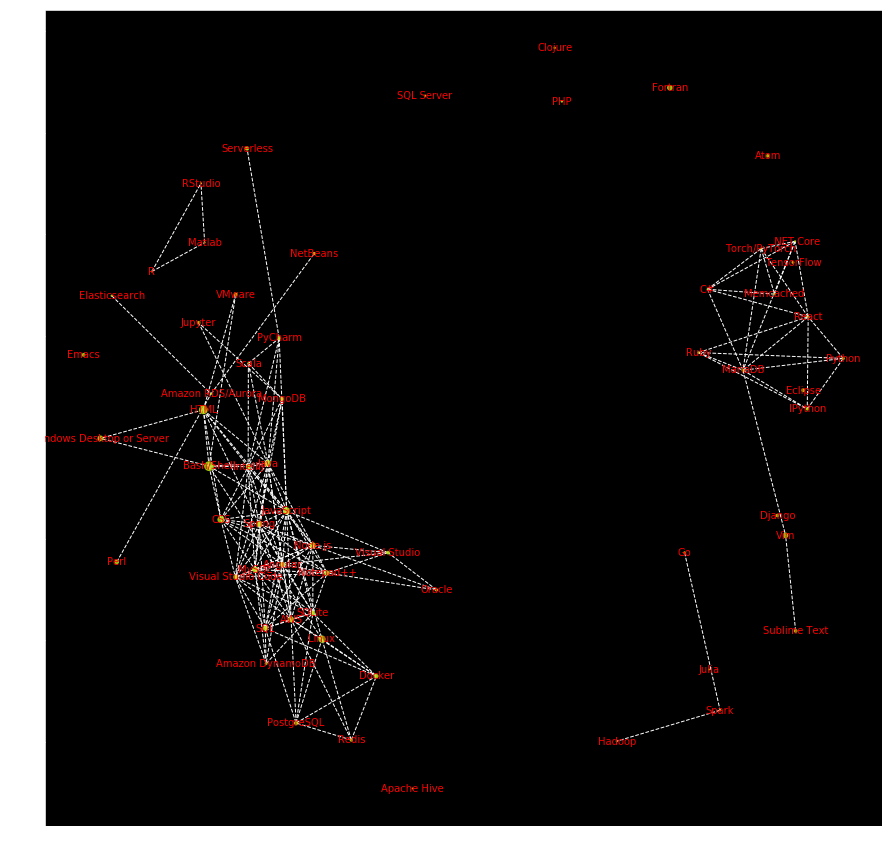

In [171]:
create_corr_network_1(tech_visualisation)

In [172]:
Unique_tech =list(Unique_tech)

(array([17.,  2.,  3.,  7.,  3.,  5.,  1.,  2.,  1.,  2.,  3.,  1.,  0.,
         1.,  0.,  3.,  1.,  1.,  1.,  1.,  0.,  0.,  1.,  0.,  0.,  0.,
         0.,  0.,  1.,  0.,  2.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.]),
 array([ 1.        ,  2.26666667,  3.53333333,  4.8       ,  6.06666667,
         7.33333333,  8.6       ,  9.86666667, 11.13333333, 12.4       ,
        13.66666667, 14.93333333, 16.2       , 17.46666667, 18.73333333,
        20.        , 21.26666667, 22.53333333, 23.8       , 25.06666667,
        26.33333333, 27.6       , 28.86666667, 30.13333333, 31.4       ,
        32.66666667, 33.93333333, 35.2       , 36.46666667, 37.73333333,
        39.        , 40.26666667, 41.53333333, 42.8       , 44.06666667,
        45.33333333, 46.6       , 47.86666667, 49.13333333, 50.4       ,
        51.66666667, 52.93333333, 54.2       , 55.46666667, 56.73333333,
 

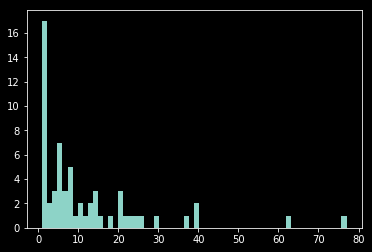

In [173]:
import matplotlib.pyplot as plt
plt.hist(total_counts_full, bins=60)

In [174]:
counts_logged = total_counts_full.copy()

In [175]:
#np.place(counts_logged, counts_logged==0, [1])

In [176]:
counts_logged = counts_logged*8

In [177]:
counts_logged = np.log(counts_logged)

In [178]:
#counts_logged = np.around(counts_logged)

In [179]:
#counts_logged = counts_logged.astype(int)

In [180]:
counts_logged = counts_logged*4

In [181]:
from bokeh.io import output_notebook, show
output_notebook()

Loading BokehJS ...

In [183]:
from bokeh.io import show, output_notebook, output_file
from bokeh.plotting import figure, output_file, gridplot
from bokeh.models.graphs import from_networkx, NodesAndLinkedEdges
from bokeh.models import Range1d, Plot
from bokeh.models.markers import Circle
from bokeh.models.glyphs import MultiLine
import bokeh.models
from bokeh.models.tools import HoverTool
from bokeh.models import sources
from bokeh.models import ColumnDataSource, DataSource
from bokeh.models.widgets import Div
from bokeh.layouts import layout, row


edges,weights = zip(*nx.get_edge_attributes(tech_visualisation, "weight").items())

#weights = float(weights)
# We could use figure here but don't want all the axes and titles
plot = Plot(x_range=Range1d(-26,26), y_range=Range1d(-26,26))
plot.background_fill_color = "white"
#plot.outline_line_width = 5
#plot.outline_line_alpha = 0.9
#plot.outline_line_color = "green"
# Create a Bokeh graph from the NetworkX input using nx.spring_layout
graph = from_networkx(tech_visualisation, nx.spring_layout, scale=23, center=(0,0))

sizes = counts_logged
# Set some of the default node glyph (Circle) properties
#figure.circle(
#source = bokeh.models.ColumnDataSource({"sizes": sizes,
#                                        "index": range(len(sizes))})
graph.node_renderer.data_source.data["sizes"] = sizes
graph.node_renderer.data_source.data["colors"] = colors
graph.node_renderer.data_source.data["job"] = predominantjobs
graph.node_renderer.data_source.data["department"] = major_departments
graph.node_renderer.data_source.data["team"] = major_teams
graph.node_renderer.data_source.data["count"] = total_counts_full

graph.node_renderer.glyph = Circle(size="sizes", fill_color='colors', tags=Unique_tech, fill_alpha=0.7, line_color="black")
graph.edge_renderer.glyph = MultiLine(line_color="#cccccc", line_alpha=0.7, line_width=3)

# green hover for both nodes and edges
graph.node_renderer.hover_glyph = Circle(size="sizes", fill_color='#abdda4')
graph.edge_renderer.hover_glyph = MultiLine(line_color='#abdda4', line_width=4)

plot.renderers.append(graph)

# When we hover over nodes, highlight adjecent edges too
graph.inspection_policy = NodesAndLinkedEdges()




plot.add_tools(HoverTool(tooltips={"Technology": '@index', 'Number of users': '@count', "Predominant department": '@department', "Predominant team": '@team' ,"Predominant job": '@job'}))
#plot.add_tools(TapTool(), BoxSelectTool(), WheelZoomTool())

legend = Div(text="""
<font size="4"> Job Role of Majority of Tech Users </font> <br/>
<span style="background:red;">&nbsp;&nbsp;&nbsp;&nbsp; </span> <font size="3">  = Software Developer </font> <br/>
<span style="background:orange;">&nbsp;&nbsp;&nbsp;&nbsp;</span> <font size="3"> = IT Practitioner </font> <br/>
<span style="background:yellow;">&nbsp;&nbsp;&nbsp;&nbsp;</span> <font size="3"> = Technical Lead </font> <br/>
<span style="background:pink;">&nbsp;&nbsp;&nbsp;&nbsp;</span> <font size="3"> = Scientific Software Engineer </font> <br/>
<span style="background:brown;">&nbsp;&nbsp;&nbsp;&nbsp;</span> <font size="3"> = HPC Support </font> <br/>
<span style="background:magenta;">&nbsp;&nbsp;&nbsp;&nbsp;</span> <font size="3"> = Software Engineer </font> <br/>
<span style="background:purple;">&nbsp;&nbsp;&nbsp;&nbsp;</span> <font size="3"> = Intern/Placement/Apprentice </font> <br/>
<span style="background:indigo;">&nbsp;&nbsp;&nbsp;&nbsp;</span> <font size="3"> = Front End Developer </font> <br/>
<span style="background:blue;">&nbsp;&nbsp;&nbsp;&nbsp;</span> <font size="3"> = Engineer </font> <br/>
<span style="background:turquoise;">&nbsp;&nbsp;&nbsp;&nbsp;</span> <font size="3"> = Scientist </font>
""")

output_file('tech_visualisation.html')

show(row([plot, legend]))
#sizing_mode='scale_width'
#grid on background? border colour on nodes? Transparency?